# Introduction

Bellabeat is a high-tech company specializing in health-focused smart products. They offer a range of smart devices that collect data on activity, sleep, stress, and reproductive health, empowering women with insights about their own health and habits.

This case study aims to analyze fitness data from smart devices to identify potential growth opportunities for Bellabeat. The focus will be on one of Bellabeat’s products: the Bellabeat app.

The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data helps users understand their current habits and make informed health decisions. The Bellabeat app integrates with their line of smart wellness products.

## Business Task 

Identify trends in how consumers use non-Bellabeat smart devices to apply insights into Bellabeat’s marketing strategy.

### Stakeholders

- Urška Sršen - Bellabeat cofounder and Chief Creative Officer
- Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team
- Bellabeat Marketing Analytics team

## Dataset Used

The dataset for this case study is the FitBit Fitness Tracker Data, available on Kaggle and provided by Mobius.

### Methods

These datasets were collected from respondents via a distributed survey on Amazon Mechanical Turk between December 3, 2016, and May 12, 2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

### Accessibility and Privacy of Data

The metadata verifies that this dataset is open-source. The owner has dedicated the work to the public domain, waiving all rights worldwide under copyright law, including related and neighboring rights, to the extent allowed by law. This allows anyone to copy, modify, distribute, and use the work, even for commercial purposes, without needing permission.

### Data Organization and Verification

The dataset comprises 18 CSV files, each representing different quantitative data tracked by Fitbit. The data is considered long format since each row corresponds to one time point per subject, resulting in multiple rows per user. Each user has a unique ID, and data is tracked by day and time.

### Data Credibility and Integrity

The dataset's small sample size (33 users) and lack of demographic information pose a risk of sampling bias. It is unclear if the sample represents the broader population. Additionally, the dataset is outdated, covering only a two-month period, limiting its current relevance.

# Process Data

In [43]:
library(tidyverse)
library(psych)
library(cowplot)
library(GGally)
library(stats)

## Importing Datasets

In [44]:
activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_steps <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourly_calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
MET_minutes <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
heartrate_seconds <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")


## Cleaning and Formatting

Check the following for each dataset and store it in a table:
- **Unique values**
- **Observations**
- **Duplicate rows**
- **Missing values**

In [45]:
datasets <- c("activity", "sleep", "hourly_steps", "hourly_calories",
              "hourly_intensity", "weight", "MET_minutes", "heartrate_seconds")

cleaning_summary <- data.frame(
    datasets = datasets,
    unique_ids = c(length(unique(activity$Id)),
                   length(unique(sleep$Id)),
                   length(unique(hourly_steps$Id)),
                   length(unique(hourly_calories$Id)),
                   length(unique(hourly_intensity$Id)),
                   
                   length(unique(weight$LogId)),
                   length(unique(MET_minutes$Id)),
                   length(unique(heartrate_seconds$Id))
                  ),
    rows = c(nrow(activity),
             nrow(sleep),
             nrow(hourly_steps),
             nrow(hourly_calories),
             nrow(hourly_intensity),
             
             nrow(weight),
             nrow(MET_minutes),
             nrow(heartrate_seconds)
            ),
    duplicate_rows = c(sum(duplicated(activity)),
                       sum(duplicated(sleep)),
                       sum(duplicated(hourly_steps)),
                       sum(duplicated(hourly_calories)),
                       sum(duplicated(hourly_intensity)),
                       
                       sum(duplicated(weight)),
                       sum(duplicated(MET_minutes)),
                       sum(duplicated(heartrate_seconds))
                      ),
    na_values = c(sum(is.na(activity)),
                  sum(is.na(sleep)),
                  sum(is.na(hourly_steps)),
                  sum(is.na(hourly_calories)),
                  sum(is.na(hourly_intensity)),
                  
                  sum(is.na(weight)),
                  sum(is.na(MET_minutes)),
                  sum(is.na(heartrate_seconds))
                 )
)
cat("\nDirty Data Summary:\n")
cleaning_summary


Dirty Data Summary:


datasets,unique_ids,rows,duplicate_rows,na_values
<chr>,<int>,<int>,<int>,<int>
activity,33,940,0,0
sleep,24,413,3,0
hourly_steps,33,22099,0,0
hourly_calories,33,22099,0,0
hourly_intensity,33,22099,0,0
weight,56,67,0,65
MET_minutes,33,1325580,0,0
heartrate_seconds,14,2483658,0,0


### Remove duplicates and missing values

In [46]:
# Remove duplicates from `sleep`
sleep <- sleep %>% distinct()

# Check for missing values in each column in `weight`
cat("\nNumber of NA values in each column for `weight`:\n")
missing_values_summary <- colSums(is.na(weight))
print(missing_values_summary)


Number of NA values in each column for `weight`:
            Id           Date       WeightKg   WeightPounds            Fat 
             0              0              0              0             65 
           BMI IsManualReport          LogId 
             0              0              0 


In [47]:
length(unique(sleep$Id))

[1] 24

The `fat` column is removed since it only has values in 2 rows, it won't be any use in the `weight` dataset.

In [48]:
# Remove `Fat` column
weight <- weight %>% select(-Fat)

In [49]:
cat("\nNumber of duplicated rows in `sleep` table:\n")
sum(duplicated(sleep))
cat("\nNumber of NA values in `weight` table:\n")
sum(is.na(weight))


Number of duplicated rows in `sleep` table:


[1] 0


Number of NA values in `weight` table:


[1] 0

### Data transformation

1. Convert date columns to be consistent (`%m/%d/%Y`) as `Date` and prepare data for join.
2. Create new columns for analysis with descriptions below.

In [50]:
activity <- activity %>%
    mutate(Date = as.Date(ActivityDate, format = "%m/%d/%Y")) %>%
    select(-ActivityDate)

activity <- activity[,-c(3:9)]


sleep <- sleep %>%
    mutate(Date = as.Date(SleepDay, format = "%m/%d/%Y %I:%M:%S %p")) %>%
    select(-SleepDay)

hourly_steps <- hourly_steps %>%
    mutate(
        # Convert to datetime (POSIXct)
        ActivityHour = as.POSIXct(ActivityHour, format = "%m/%d/%Y %I:%M:%S %p"),
        Date = as.Date(ActivityHour),
        Hour = hour(ActivityHour),
        Day = day(ActivityHour)
    ) %>%
    select(-ActivityHour)



hourly_calories <- hourly_calories %>%
    mutate(
        ActivityHour = as.POSIXct(ActivityHour, format = "%m/%d/%Y %I:%M:%S %p"),
        Date = as.Date(ActivityHour),
        Hour = hour(ActivityHour)
    ) %>%
    select(-ActivityHour)

hourly_intensity <- hourly_intensity %>%
    mutate(
        ActivityHour = as.POSIXct(ActivityHour, format = "%m/%d/%Y %I:%M:%S %p"),
        Date = as.Date(ActivityHour),
        Hour = hour(ActivityHour)
    ) %>%
    select(-ActivityHour)

MET_minutes <- MET_minutes %>%
    mutate(
        ActivityMinute = as.POSIXct(ActivityMinute, format = "%m/%d/%Y %I:%M:%S %p"),
        Date = as.Date(ActivityMinute),
        Hour = hour(ActivityMinute),
        Minute = minute(ActivityMinute)
    ) %>%
    select(-ActivityMinute)

heartrate_seconds <- heartrate_seconds %>%
    mutate(
        Time = as.POSIXct(Time, format = "%m/%d/%Y %I:%M:%S %p"),
        Date = as.Date(Time),
        Hour = hour(Time),
        Minute = minute(Time)
    ) %>%
    select(-Time)

In [51]:
datasets <- c('activity', 'sleep', 'hourly_steps','hourly_calories',
               'hourly_intensity','MET_minutes','heartrate_seconds')

for (d in datasets) {
    
    cat("Summary for dataset", d, ":\n\n")
    print(str(get(d)))
    cat("\n--------------------------\n")
    
}

Summary for dataset activity :

'data.frame':	940 obs. of  8 variables:
 $ Id                  : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ TotalSteps          : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ VeryActiveMinutes   : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes: int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes    : int  728 776 1218 726 773 539 1149 775 818 838 ...
 $ Calories            : int  1985 1797 1776 1745 1863 1728 1921 2035 1786 1775 ...
 $ Date                : Date, format: "2016-04-12" "2016-04-13" ...
NULL

--------------------------
Summary for dataset sleep :

'data.frame':	410 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407

### Merge Tables (Activity and Sleep)

We inner join `activity` and `sleep` datasets by the `Id` and `Date` to access both activites and sleep times for a more comprehensive analysis. The `sleep` dataset has **24** unique users, while the `activity` dataset has **33**, leaving 9 users without any sleep data.

In [52]:
# New dataframe with inner join by id and date
merged <- merge(activity, sleep, by=c('Id', 'Date'))

# Calculate total time spent in bed while NOT asleep
merged$TotalTimeInBedNotAsleep <- merged$TotalTimeInBed - merged$TotalMinutesAsleep

# Total logged time (sum of all acitivites for the day)
merged$TotalLoggedTime <- rowSums(merged[, c("VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes", "TotalTimeInBed")],
                                  na.rm = TRUE)

merged$DayOfWeek <- wday(merged$Date, label = TRUE)
merged$DayOfWeek <- as.factor(merged$DayOfWeek)
merged$Week <- week(merged$Date)

str(merged)

'data.frame':	410 obs. of  15 variables:
 $ Id                     : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ Date                   : Date, format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps             : int  13162 10735 9762 12669 9705 15506 10544 9819 14371 10039 ...
 $ VeryActiveMinutes      : int  25 21 29 36 38 50 28 19 41 39 ...
 $ FairlyActiveMinutes    : int  13 19 34 10 20 31 12 8 21 5 ...
 $ LightlyActiveMinutes   : int  328 217 209 221 164 264 205 211 262 238 ...
 $ SedentaryMinutes       : int  728 776 726 773 539 775 818 838 732 709 ...
 $ Calories               : int  1985 1797 1745 1863 1728 2035 1786 1775 1949 1788 ...
 $ TotalSleepRecords      : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep     : int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed         : int  346 407 442 367 712 320 377 364 384 449 ...
 $ TotalTimeInBedNotAsleep: int  19 23 30 27 12 16 17 39 23 19 ...
 $ TotalLoggedTime        : num  1440 1440 1440 1407 1473 ...
 $ 

# Exploring Data

## 1. Unusual Sedentary Time in `Activity`

In [53]:
round(psych::describe(activity %>% select(-c("Id", "Date"))), 2)
cat("Average Sedentary Time in Sedentary:\n")
round(psych::describe(activity %>% select(SedentaryMinutes), 2))[,"mean"]

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TotalSteps,1,940,7637.91,5087.15,7405.5,7388.26,5109.78,0,36019,36019,0.65,1.15,165.92
VeryActiveMinutes,2,940,21.16,32.84,4.0,14.00,5.93,0,210,210,2.17,5.72,1.07
FairlyActiveMinutes,3,940,13.56,19.99,6.0,9.36,8.90,0,143,143,2.47,7.92,0.65
LightlyActiveMinutes,4,940,192.81,109.17,199.0,193.55,102.30,0,518,518,-0.04,-0.37,3.56
SedentaryMinutes,5,940,991.21,301.27,1057.5,998.63,386.96,0,1440,1440,-0.29,-0.67,9.83
Calories,6,940,2303.61,718.17,2134.0,2261.10,692.37,0,4900,4900,0.42,0.61,23.42


Average Sedentary Time in Sedentary:


[1] 991

The `activity` dataset shows **above-average sedentary minutes** (mean = 991.2 minutes / 16.5 hours), **with some entries indicating 24 hours of sitting time**. We will analyze the entries where users seem to spend the entire day being sedentary. The rest of the distributions look fairly expected. 

Average Sedentary Time (all users): all


[1] 991

Average Sedentary Time (users with sleep data): blue 


[1] 712

Average Sedentary Time (users without sleep data): yellow


[1] 1207

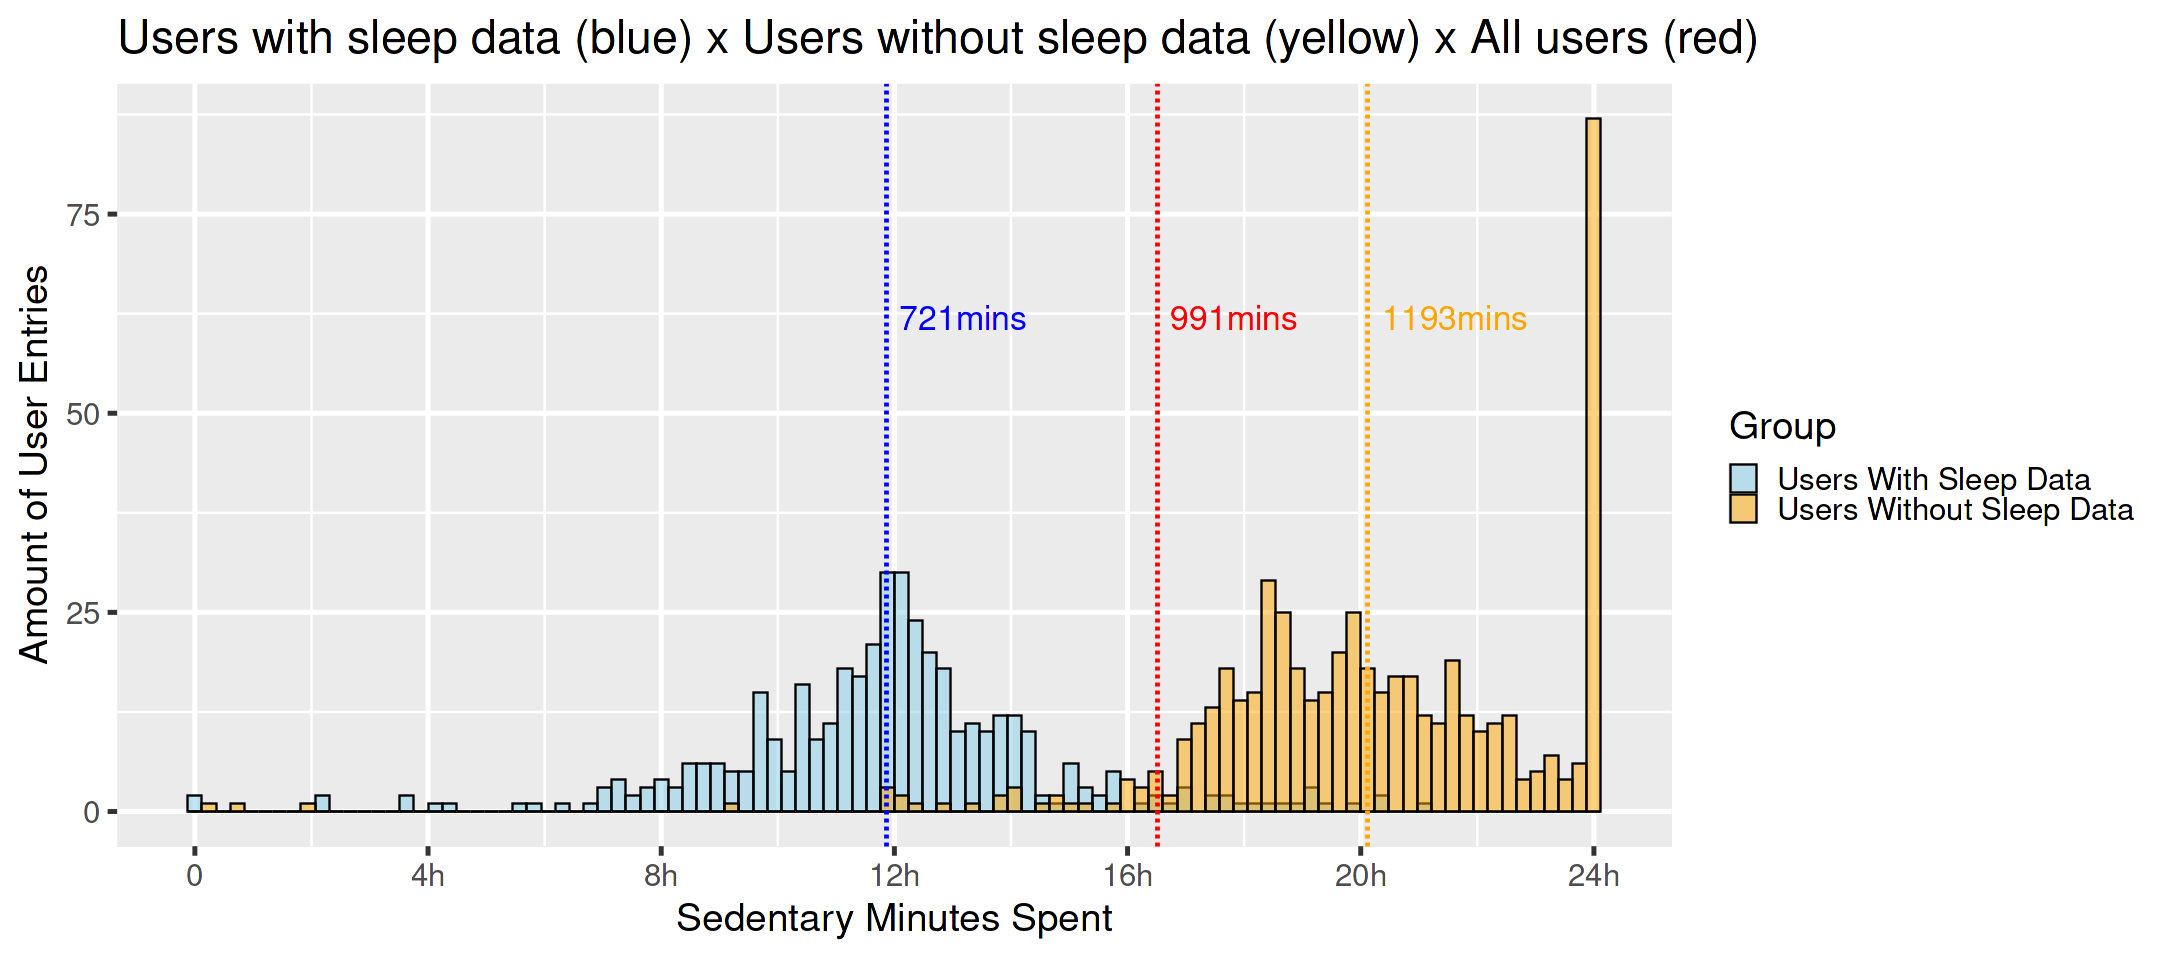

In [54]:
options(repr.plot.width = 18, repr.plot.height = 8)

activity_removed <- anti_join(activity, merged, by = c("Id", "Date"))

cat("Average Sedentary Time (all users): all\n")
sed_mean_a <- round(psych::describe(activity %>% select(SedentaryMinutes), 2))[,"mean"]
sed_mean_a

cat("Average Sedentary Time (users with sleep data): blue \n")
sed_mean_w <- round(psych::describe(merged %>% select(SedentaryMinutes), 2))[,"mean"]
sed_mean_w

cat("Average Sedentary Time (users without sleep data): yellow\n")
sed_mean_wo <- round(psych::describe(activity_removed %>% select(SedentaryMinutes), 2))[,"mean"]
sed_mean_wo

combined_data_sedentary <- bind_rows(
  merged %>% mutate(Group = "Users With Sleep Data"),
  activity_removed %>% mutate(Group = "Users Without Sleep Data")
)

sedentary_combined_p <- ggplot(combined_data_sedentary, aes(x = SedentaryMinutes, fill = Group)) +
    geom_histogram(position = "identity", alpha = 0.5, bins = 100, color = "black") +
    geom_vline(xintercept = c(sed_mean_w, sed_mean_a, sed_mean_wo), linetype = "dashed", color = c("blue", "red", "orange"), size = 1) +
    annotate("text", x = sed_mean_w, y = 62, label = "721mins", hjust = -.1, color = "blue", size = 7) +
    annotate("text", x = sed_mean_a, y = 62, label = "991mins", hjust = -.1, color = "red", size = 7) +
    annotate("text", x = sed_mean_wo, y = 62, label = "1193mins", hjust = -.1, color = "orange", size = 7) +
    scale_fill_manual(values = c("skyblue", "orange")) +
    scale_x_continuous(breaks = seq(0, 1440, by = 240), 
                   labels = c("0", "4h", "8h", "12h", "16h", "20h", "24h")) +
    labs(title = "Users with sleep data (blue) x Users without sleep data (yellow) x All users (red) ",
         x = "Sedentary Minutes Spent",
         y = "Amount of User Entries") +
    theme_minimal() +
    theme_gray(base_size = 23)
sedentary_combined_p


> The `activity` dataset does not include any sleep data, and some entries report 1,440 minutes of sedentary time, which leads to a highly skewed distribution of sedentary time. In contrast, the sedentary time in the `merged` dataset follows a fairly normal distribution, with an average of around 712 minutes.

The inflated sedentary times likely arise from missing or misrecorded sleep data, device errors, or inconsistent device usage, such as not wearing the device during sleep.

In [55]:
activity_removed$TotalLoggedTime <- rowSums(activity_removed[, c("VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes")], na.rm = TRUE)
summary(activity_removed[, c("Calories", "TotalSteps", "SedentaryMinutes", "TotalLoggedTime")])

    Calories      TotalSteps    SedentaryMinutes TotalLoggedTime
 Min.   :   0   Min.   :    0   Min.   :  13     Min.   :  26   
 1st Qu.:1826   1st Qu.: 2508   1st Qu.:1105     1st Qu.:1440   
 Median :2089   Median : 6470   Median :1201     Median :1440   
 Mean   :2237   Mean   : 6959   Mean   :1207     Mean   :1410   
 3rd Qu.:2743   3rd Qu.:10136   3rd Qu.:1336     3rd Qu.:1440   
 Max.   :4547   Max.   :36019   Max.   :1440     Max.   :1440   

> The data for users <u>without corresponding sleep times</u> primarily clusters around extremely high sedentary times (18-24 hours). When their recorded activity times are summed, they consistently total 1,440 minutes (a full 24 hours), excluding sleep time.

This is problematic because the misinterpreted sleep data means the analysis will incorrectly assume 0 minutes of sleep for these users. As a result, it distorts the overall interpretation, making these users appear to be awake for the entire day and more sedentary.

In [56]:
summary(merged)

       Id                 Date              TotalSteps    VeryActiveMinutes
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :   17   Min.   :  0.00   
 1st Qu.:3.977e+09   1st Qu.:2016-04-19   1st Qu.: 5189   1st Qu.:  0.00   
 Median :4.703e+09   Median :2016-04-27   Median : 8913   Median :  9.00   
 Mean   :4.995e+09   Mean   :2016-04-26   Mean   : 8515   Mean   : 25.05   
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:11370   3rd Qu.: 38.00   
 Max.   :8.792e+09   Max.   :2016-05-12   Max.   :22770   Max.   :210.00   
                                                                           
 FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes    Calories   
 Min.   :  0.00      Min.   :  2.0        Min.   :   0.0   Min.   : 257  
 1st Qu.:  0.00      1st Qu.:158.0        1st Qu.: 631.2   1st Qu.:1841  
 Median : 11.00      Median :208.0        Median : 717.0   Median :2207  
 Mean   : 17.92      Mean   :216.5        Mean   : 712.1   Mean   :2389  
 3rd Qu.: 26.75      3

The merged dataset presents a more realistic summary of user activity. Total Steps average 8,515, indicating a moderately active group, with a broad range from 17 to 22,770 steps. Very Active Minutes average 25.05, while Fairly Active and Lightly Active Minutes are 17.92 and 216.5, respectively, reflecting typical activity levels.

Sleep data integration has improved accuracy, with Total Minutes Asleep averaging 419.2 minutes, close to the CDC's minimum of 420 minutes, and Total Time in Bed averaging 458.5 minutes, indicating an expected discrepancy between time spent in bed and actual sleep time. Sedentary Minutes have dropped to an average of 712.1, compared to 991.21 in the original activity dataset, offering a clearer view of daily routines. Total Logged Time averages 1,430 minutes, closely aligning with a full day, though some entries exceed 1,440 minutes, indicating possible data errors for further review. Overall, altough we have around 30% less unique users, **the merged data now reflects more through and natural activity patterns**.

- Current guidelines suggest that most adults should aim for about 8,000-10,000 steps per day. https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day#summary

- Those who sat for more than 8 hours (480 mins) a day with no physical activity had a risk of dying similar to that posed by obesity and smoking. https://www.mayoclinic.org/healthy-lifestyle/adult-health/expert-answers/sitting/faq-20058005

## 2. Total Logged Time of Users
### Analyzing Total usage 
#### (Under 24 Hours / 24 Hours / Over 24 Hours)

Using wearable devices for 24-hour monitoring enhances the ability to capture comprehensive data on physical activity, sedentary behavior, and sleep throughout the day. This continuous tracking provides a more complete picture of these interconnected behaviors and allows for more accurate insights than self-report methods. It improves the quality and depth of data collected by capturing variations in activity patterns across different times of the day, leading to better analysis and understanding of daily routines and health behaviors. 

Source: _WHO, Global status report on physical activity 2022, pg. 83._
([https://iris.who.int/bitstream/handle/10665/363607/9789240059153-eng.pdf?sequence=1](http://))

**Total logged time is calculated as such:**

> `TotalLoggedTime` = `VeryActiveMinutes` + `FairlyActiveMinutes` + `LightlyActiveMinutes` + `SedentaryMinutes` + `TotalTimeInBed`

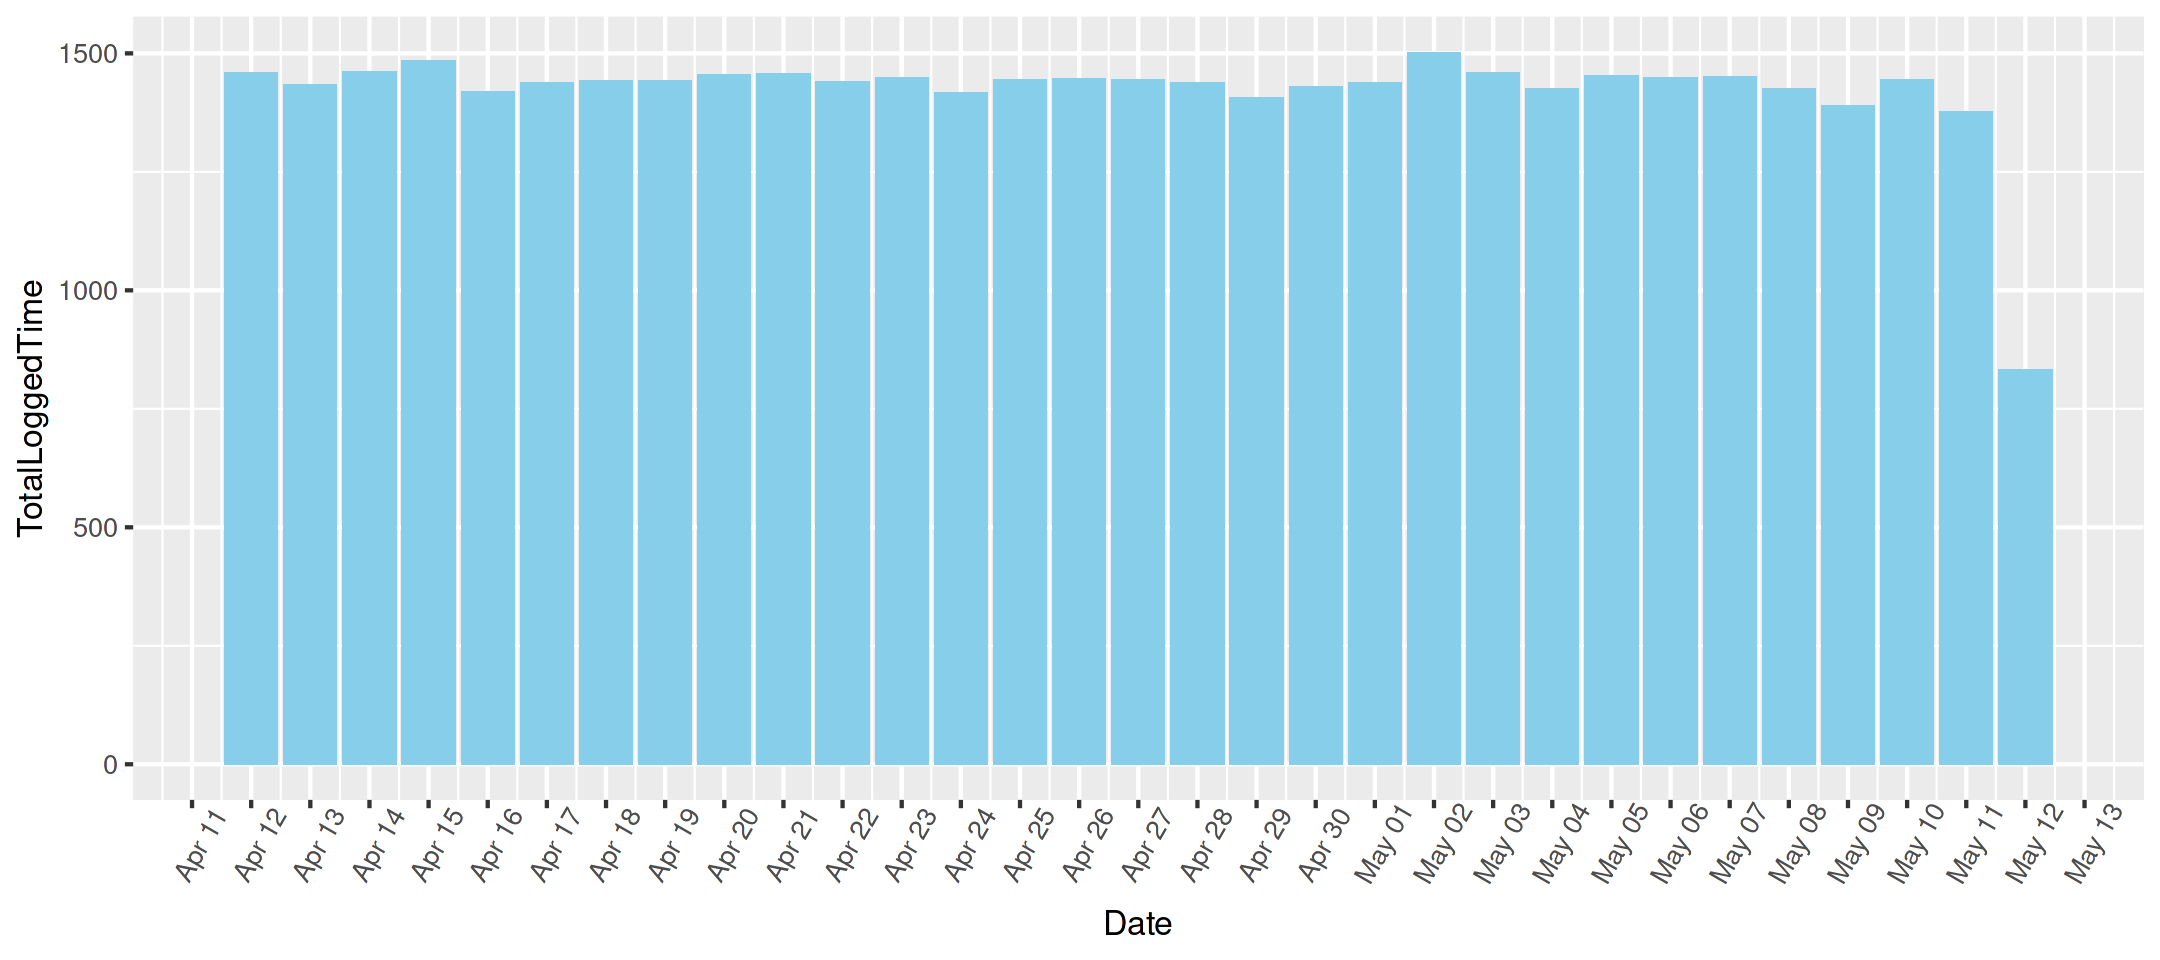

In [57]:
merged %>%
    ggplot(aes(x = Date, y = TotalLoggedTime)) +
    stat_summary(fun = mean, geom = "bar", fill = "skyblue") +
    theme_minimal() +
    theme_grey(base_size = 20) +
    scale_x_date(date_breaks = "1 day", date_labels = "%b %d") +
    theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust = 0.3))

During the 1-month data collection period, most days have an average total logged time close to 1,440 minutes, suggesting complete daily records. However, **on May 12th, the average logged time is about half of a full day**, indicating incomplete or missing data. As a result, **we will exclude this day from the analysis**.

In [58]:
merged <- merged %>% filter(Date < as.Date("2016-05-12"))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


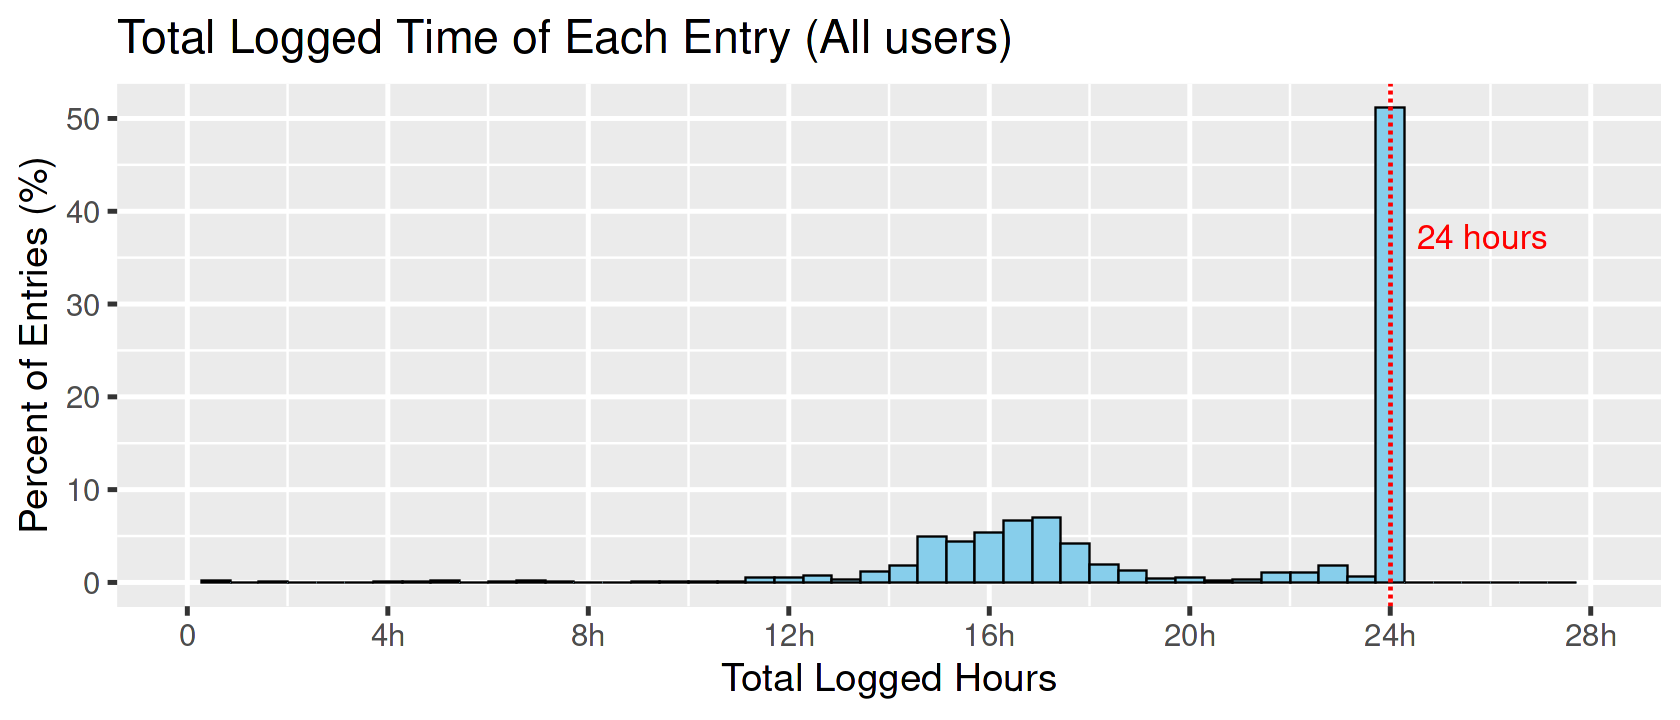

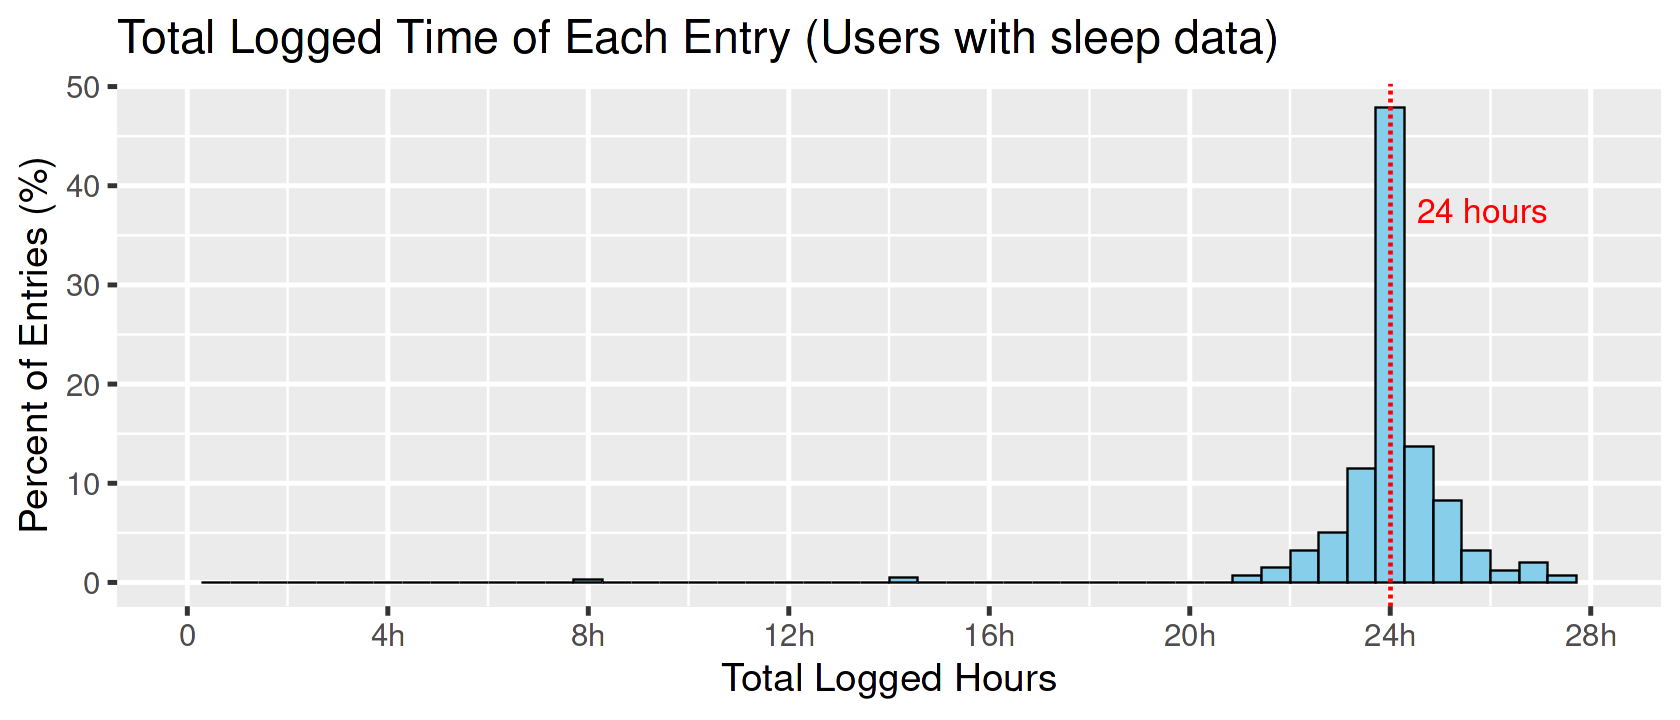

In [59]:
options(repr.plot.width = 14, repr.plot.height = 6)

activity$TotalLoggedTime <- rowSums(activity[, c("VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes")], na.rm = TRUE)

total_logged_time_activity <- ggplot(activity, aes(x = TotalLoggedTime)) +
    geom_histogram(aes(y = (..count..) / sum(..count..) * 100), 
                 bins = 50, fill = "skyblue", color = "black") +
    labs(title = "Total Logged Time of Each Entry (All users)", x = "Total Logged Hours", y = "Percent of Entries (%)") +
    scale_x_continuous(breaks = seq(0, 1680, by = 240), 
                       labels = c("0", "4h", "8h", "12h", "16h", "20h", "24h", "28h"),
                       limits = c(0, 1680)) +
    geom_vline(xintercept = 1440, linetype = "dashed", color = "red", size = 1) +
    annotate("text", x = 1440, y = 40, label = "24 hours", vjust = 1.5, color = "red", angle = 0, hjust = -0.2, size = 7) +
    theme_minimal() + 
    theme_gray(base_size = 23)

total_logged_time_activity

total_logged_time_merged <- ggplot(merged, aes(x = TotalLoggedTime)) +
    geom_histogram(aes(y = (..count..) / sum(..count..) * 100), 
                 bins = 50, fill = "skyblue", color = "black") +
    labs(title = "Total Logged Time of Each Entry (Users with sleep data)", x = "Total Logged Hours", y = "Percent of Entries (%)") +
    scale_x_continuous(breaks = seq(0, 1680, by = 240), 
                       labels = c("0", "4h", "8h", "12h", "16h", "20h", "24h", "28h"),
                       limits = c(0, 1680)) +
    geom_vline(xintercept = 1440, linetype = "dashed", color = "red", size = 1) +
    annotate("text", x = 1440, y = 40, label = "24 hours", vjust = 1.5, color = "red", angle = 0, hjust = -0.2, size = 7) +
    theme_minimal() + 
    theme_gray(base_size = 23)

total_logged_time_merged

**While most users seem to have logged close to 1,440 minutes per day, some entries show significantly less usage — below 500 minutes — while others exceed the 24-hour mark, showing more than 1,440 logged minutes**. Given that each row represents activities within a single 24-hour period for a single user, these discrepancies raise questions about data accuracy and reliability. We will analyze the statistical differences among these entries to determine whether the variations impact our analysis and identify any potential data quality issues.

In [60]:
# Create groups in the dataset
merged <- merged %>%
    mutate(Group = case_when(
        TotalLoggedTime < 1440 ~ "below",
        TotalLoggedTime == 1440 ~ "equal",
        TotalLoggedTime > 1440 ~ "above"
    ))

merged$Group <- as.factor(merged$Group)

In [61]:
run_anova <- function(columns, data) {
  results <- list()  # To store results for each variable
  
  for (col in columns) {
    # Dynamically create the formula
    formula <- as.formula(paste(col, "~ Group"))
    
    # Run ANOVA
    aov_model <- aov(formula, data = data)
    
    # Get the summary of the ANOVA model
    aov_summary <- summary(aov_model)
    
    # Run Tukey's HSD post hoc test
    tukey_results <- TukeyHSD(aov_model)
    
    # Store results
    results[[col]] <- list(
      aov_model = aov_model,
      aov_summary = aov_summary,
      tukey_results = tukey_results
    )
  }
  
  return(results)
}

columns <- c('VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 
             'SedentaryMinutes', 'TotalMinutesAsleep', 'TotalTimeInBed', 
             'TotalTimeInBedNotAsleep', 'TotalLoggedTime')

# Call the function
anova_results <- run_anova(columns, merged)

In [62]:
# Loop through all variables and print Tukey's HSD results with p < 0.05
for (col in names(anova_results)) {
  cat("Significant Tukey HSD Results for", col, ":\n")
  
  # Extract the Tukey HSD results for the current variable
  tukey_results <- anova_results[[col]]$tukey_results$Group
  
  # Filter results to only show those with p-value less than 0.05
  significant_results <- tukey_results[tukey_results[, "p adj"] < 0.05, , drop = FALSE]
  
  # Check if there are any significant results
  if (length(significant_results) > 0 && nrow(significant_results) > 0) {
    print(round(significant_results, 4))
  } else {
    cat("No significant results.\n")
  }
  
  cat("\n-------------------------\n")
}


Significant Tukey HSD Results for VeryActiveMinutes :
No significant results.

-------------------------
Significant Tukey HSD Results for FairlyActiveMinutes :
No significant results.

-------------------------
Significant Tukey HSD Results for LightlyActiveMinutes :
No significant results.

-------------------------
Significant Tukey HSD Results for SedentaryMinutes :
                diff       lwr      upr  p adj
below-above -62.6678 -103.9237 -21.4119 0.0011
equal-above  73.0783   32.2848 113.8719 0.0001
equal-below 135.7462   92.4589 179.0334 0.0000

-------------------------
Significant Tukey HSD Results for TotalMinutesAsleep :
                 diff       lwr      upr  p adj
below-above  -37.5672  -68.7125  -6.4218 0.0132
equal-above -116.8962 -147.6925 -86.0998 0.0000
equal-below  -79.3290 -112.0079 -46.6501 0.0000

-------------------------
Significant Tukey HSD Results for TotalTimeInBed :
                 diff       lwr      upr  p adj
below-above  -46.2926  -80.7826 -11.802

In [63]:
#  Gather all the means for all (<1440, =1440, >1440 minutes)
summaryAbove1440 <- merged %>% filter(Group == "above") %>% describe() %>% round(1) %>% select(3) %>% format(scientific = FALSE)
names(summaryAbove1440) <- "Log Time (>1440)"
summaryEqual1440 <- merged %>% filter(Group == "equal") %>% describe() %>% round(1) %>% select(3) %>% format(scientific = FALSE)
names(summaryEqual1440) <- "Log Time (1440)"
summaryBelow1440 <-merged %>% filter(TotalLoggedTime < 1440) %>% describe() %>% round(1) %>% select(3) %>% format(scientific = FALSE)
names(summaryBelow1440) <- "Log Time (<1440)"

UserTypeSummary <- data.frame(row.names = NULL,
  Column = rownames(summaryEqual1440)
)

UserTypeSummary <- cbind(UserTypeSummary, summaryAbove1440, summaryEqual1440, summaryBelow1440)
UserTypeSummary[-c(1,2,14:17),-1]

cat("Number of users (<1440 minutes):", merged %>% filter(TotalLoggedTime < 1440) %>% nrow(), "\n")
cat("Number of users (=1440 minutes):", merged %>% filter(TotalLoggedTime == 1440) %>% nrow(), "\n")
cat("Number of users (>1440 minutes):", merged %>% filter(TotalLoggedTime > 1440) %>% nrow(), "\n")
cat("Total number of users:          ", nrow(merged), "\n")

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”


,Log Time (>1440),Log Time (1440),Log Time (<1440)
,<I<chr>>,<I<chr>>,<I<chr>>
TotalSteps,8916.6,8688.4,8155.5
VeryActiveMinutes,30.1,22.3,22.8
FairlyActiveMinutes,17.6,21.7,15.5
LightlyActiveMinutes,226.6,206.4,222.0
SedentaryMinutes,717.1,790.1,654.4
Calories,2571.0,2194.0,2444.1
TotalSleepRecords,1.1,1.2,1.1
TotalMinutesAsleep,466.7,349.8,429.1
TotalTimeInBed,505.4,399.4,459.1


Number of users (<1440 minutes): 121 
Number of users (=1440 minutes): 126 
Number of users (>1440 minutes): 155 
Total number of users:           402 


When examining the variables of interest for statistically significant differences between user activity groups (below 1,440 minutes, equal to 1,440 minutes, and above 1,440 minutes of logged time), meaningful distinctions emerged across several measures. Significant differences were found in variables such as `SedentaryMinutes`, `TotalMinutesAsleep`, `TotalTimeInBed`, `TotalTimeInBedNotAsleep`, and `TotalLoggedTime`. These results indicate that, <u>statistically</u>, users within these time-logged categories exhibit considerable differences in their activity levels and sleep metrics, suggesting behavioral variations linked to total logged activity time.

While statistical significance is crucial for evaluating data characteristics, the average values in the `UserTypeSummary` table suggest that the groups share similar characteristics and present realistic outcomes. **Given the limited dataset, we will disregard the differences from the ANOVA results for this case study**. However, this inconsistency should not be completely overlooked and warrants further investigation with relevant stakeholders, including the marketing and sales teams, to ensure more accurate results in the future.

## 3. Daily Steps per User


`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Summary statistics for average dialy steps:


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AvgDailySteps,2,33,7463.761,3592.985,7264.233,7334.531,3342.505,916.129,15987.84,15071.71,0.2735449,-0.3488212,625.4583


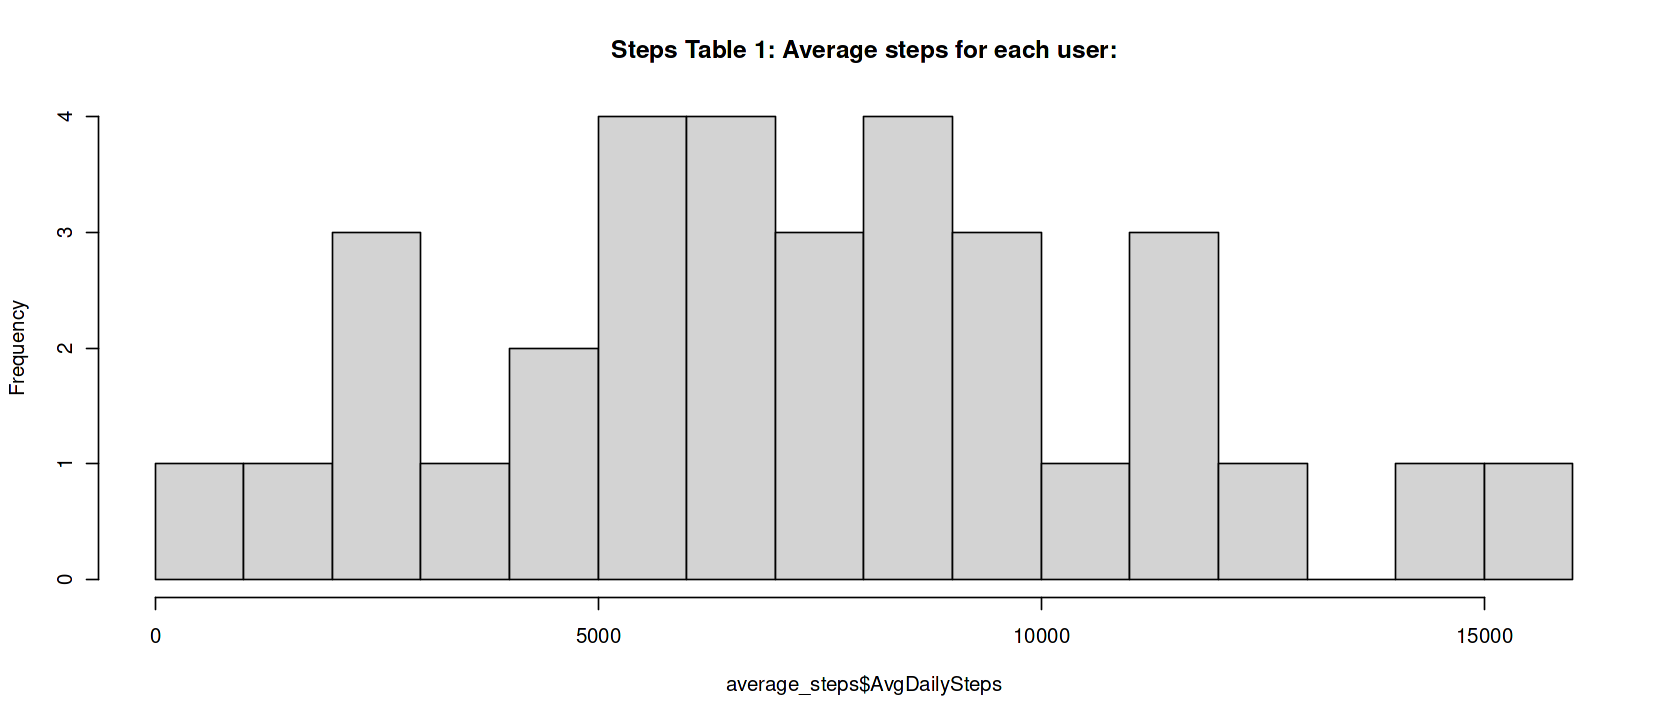

In [64]:
# Calculate average daily steps for each user
average_steps <- hourly_steps %>%
  group_by(Id, Date) %>%
  summarise(DailySteps = sum(StepTotal)) %>%
  group_by(Id) %>%
  summarise(AvgDailySteps = mean(DailySteps))

hist(average_steps$AvgDailySteps, main = "Steps Table 1: Average steps for each user:", breaks = 12)

cat("Summary statistics for average dialy steps:\n")
describe(average_steps)[2,]

On average, Fitbit users have a mean daily step count of 7464, with minimum taking 916 steps to maximum of 15,987 observed.

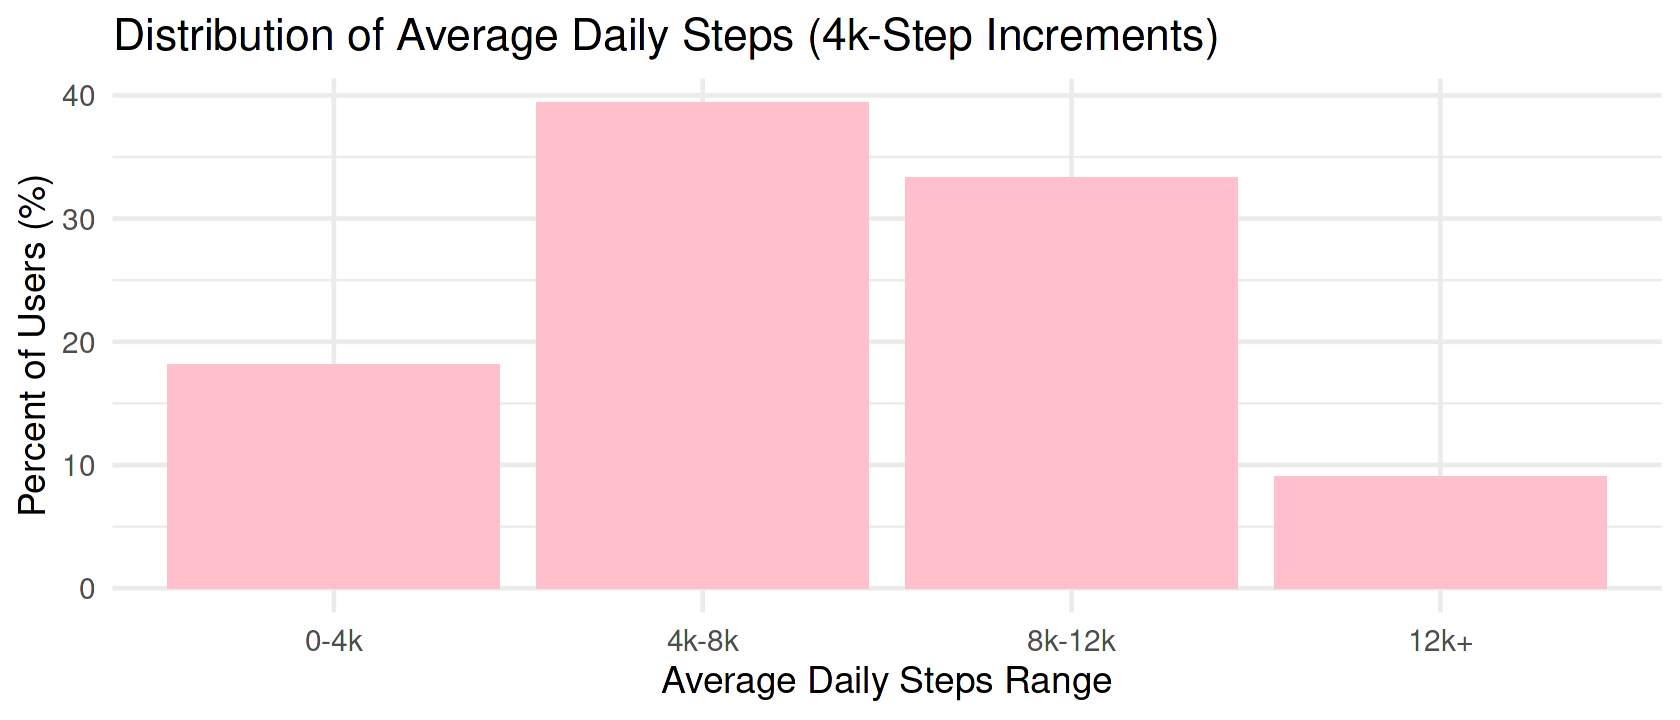

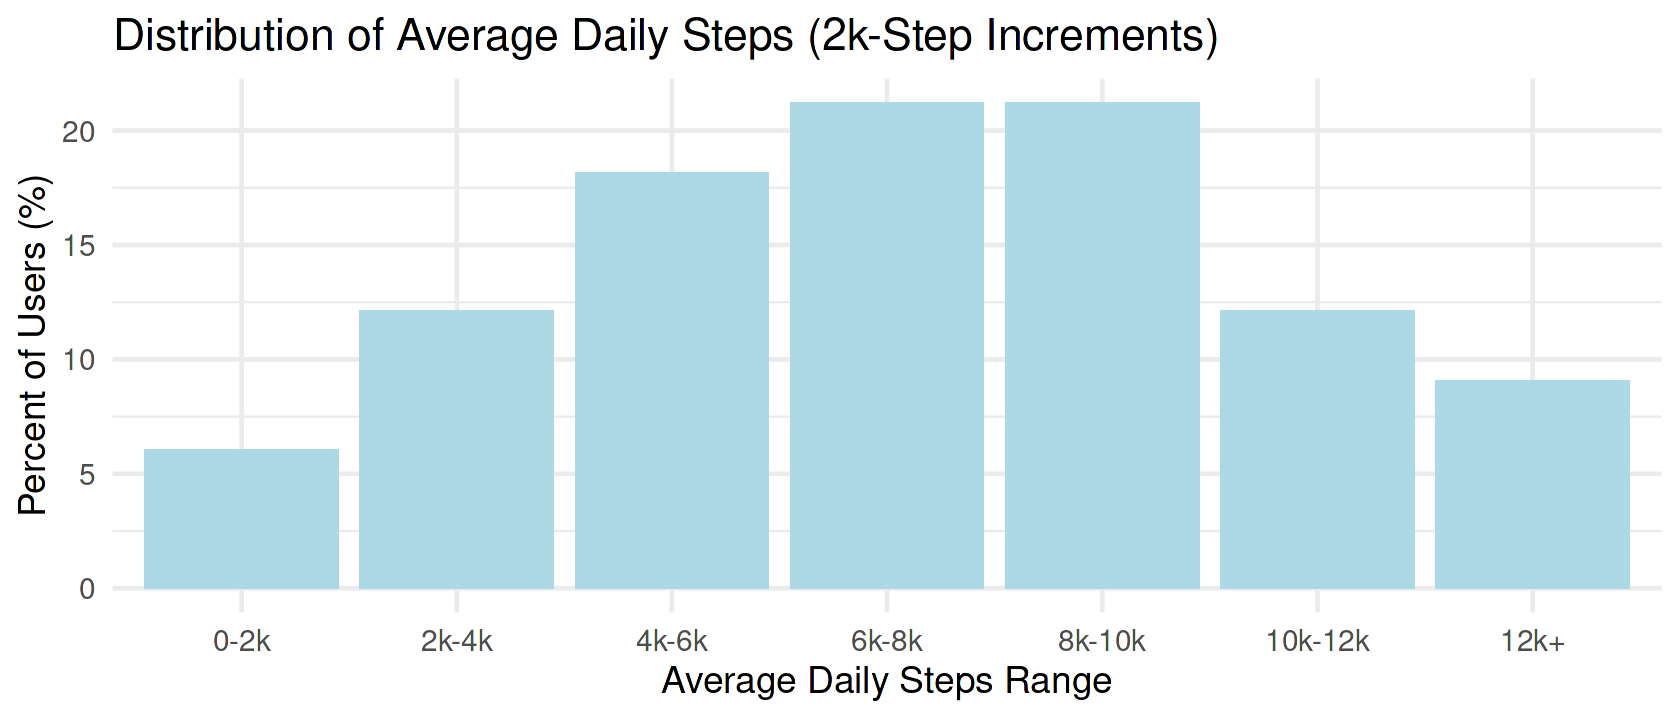

In [65]:
average_steps <- average_steps %>%
    mutate(StepRange2k = cut(AvgDailySteps, 
                         breaks = c(0, 2000, 4000, 6000, 8000, 10000, 12000, Inf), 
                         labels = c("0-2k", "2k-4k", "4k-6k", "6k-8k", "8k-10k", "10k-12k", "12k+"),
                         right = FALSE),
           StepRange4k = cut(AvgDailySteps, 
                         breaks = c(0, 4000, 8000, 12000, Inf), 
                         labels = c("0-4k", "4k-8k", "8k-12k", "12k+"),
                         right = FALSE))


# Percentage of users in each 2k range
step_distribution_2k <- average_steps %>%
  group_by(StepRange2k) %>%
  summarise(UserCount = n()) %>%
  mutate(PercentUsers = (UserCount / sum(UserCount)) * 100)

# Percentage of users in each 4k range
step_distribution_4k <- average_steps %>%
  group_by(StepRange4k) %>%
  summarise(UserCount = n()) %>%
  mutate(PercentUsers = (UserCount / sum(UserCount)) * 100)

ggplot(step_distribution_4k, aes(x = StepRange4k, y = PercentUsers)) +
  geom_bar(stat = "identity", fill = "pink") +
  labs(title = "Distribution of Average Daily Steps (4k-Step Increments)",
       x = "Average Daily Steps Range",
       y = "Percent of Users (%)") +
  theme_minimal(base_size = 22)

ggplot(step_distribution_2k, aes(x = StepRange2k, y = PercentUsers)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  labs(title = "Distribution of Average Daily Steps (2k-Step Increments)",
       x = "Average Daily Steps Range",
       y = "Percent of Users (%)") +
  theme_minimal(base_size = 22)

In [66]:
cat(paste0("Percentage of users taking less than 4,000 steps: ", round(step_distribution_4k[1,3], 1), "%\n"))
cat(paste0("Percentage of users taking 4,000 - 7,999 steps: ", round(step_distribution_4k[2,3], 1), "%\n"))
cat(paste0("Percentage of users taking 8,000 - 11,999 steps: ", round(step_distribution_4k[3,3], 1), "%\n"))
cat(paste0("Percentage of users taking 12,000 steps and more: ", round(step_distribution_4k[4,3], 1), "%\n"))

Percentage of users taking less than 4,000 steps: 18.2%
Percentage of users taking 4,000 - 7,999 steps: 39.4%
Percentage of users taking 8,000 - 11,999 steps: 33.3%
Percentage of users taking 12,000 steps and more: 9.1%


The analysis of the merged dataset reveals that **18.2% of users take fewer than 4,000 steps daily**, while **39.4% average between 4,000 and 7,999 steps, 33.3% achieve between 8,000 and 11,999 steps**, and **9.1% exceed 12,000 steps per day**. According to CDC, individuals taking 8,000 steps per day experienced a 50% lower risk of death compared to those taking 4,000, while 12,000 steps per day were associated with a 65% lower risk of mortality from any cause. While only 9.1% of users meet or exceed 12,000 steps, the majority **(72.7%) achieve at least 4,000 steps**, which suggests a moderate level of physical activity, accepted as the bare minimum. 

Despite these positive outcomes, **18.2% of users still fall below the minimum benchmark of 4,000** steps per day, suggesting the need for further encouragement to increase their activity levels. This group should be targeted with initiatives to promote small, achievable goals that gradually raise their daily step count. Additionally, nearly 20% of users hover around the 8,000-step mark but do not consistently meet it (as seen on Steps Table 3). These users are on the brink of reaping significant health benefits, as reaching 8,000 steps has been shown to significantly lower mortality risks. Reminders about the advantages of reaching this threshold, along with strategies for sustainable step increases, could motivate this group to consistently achieve 8,000 steps or more.

## 4. Activities and Sleep Distributions

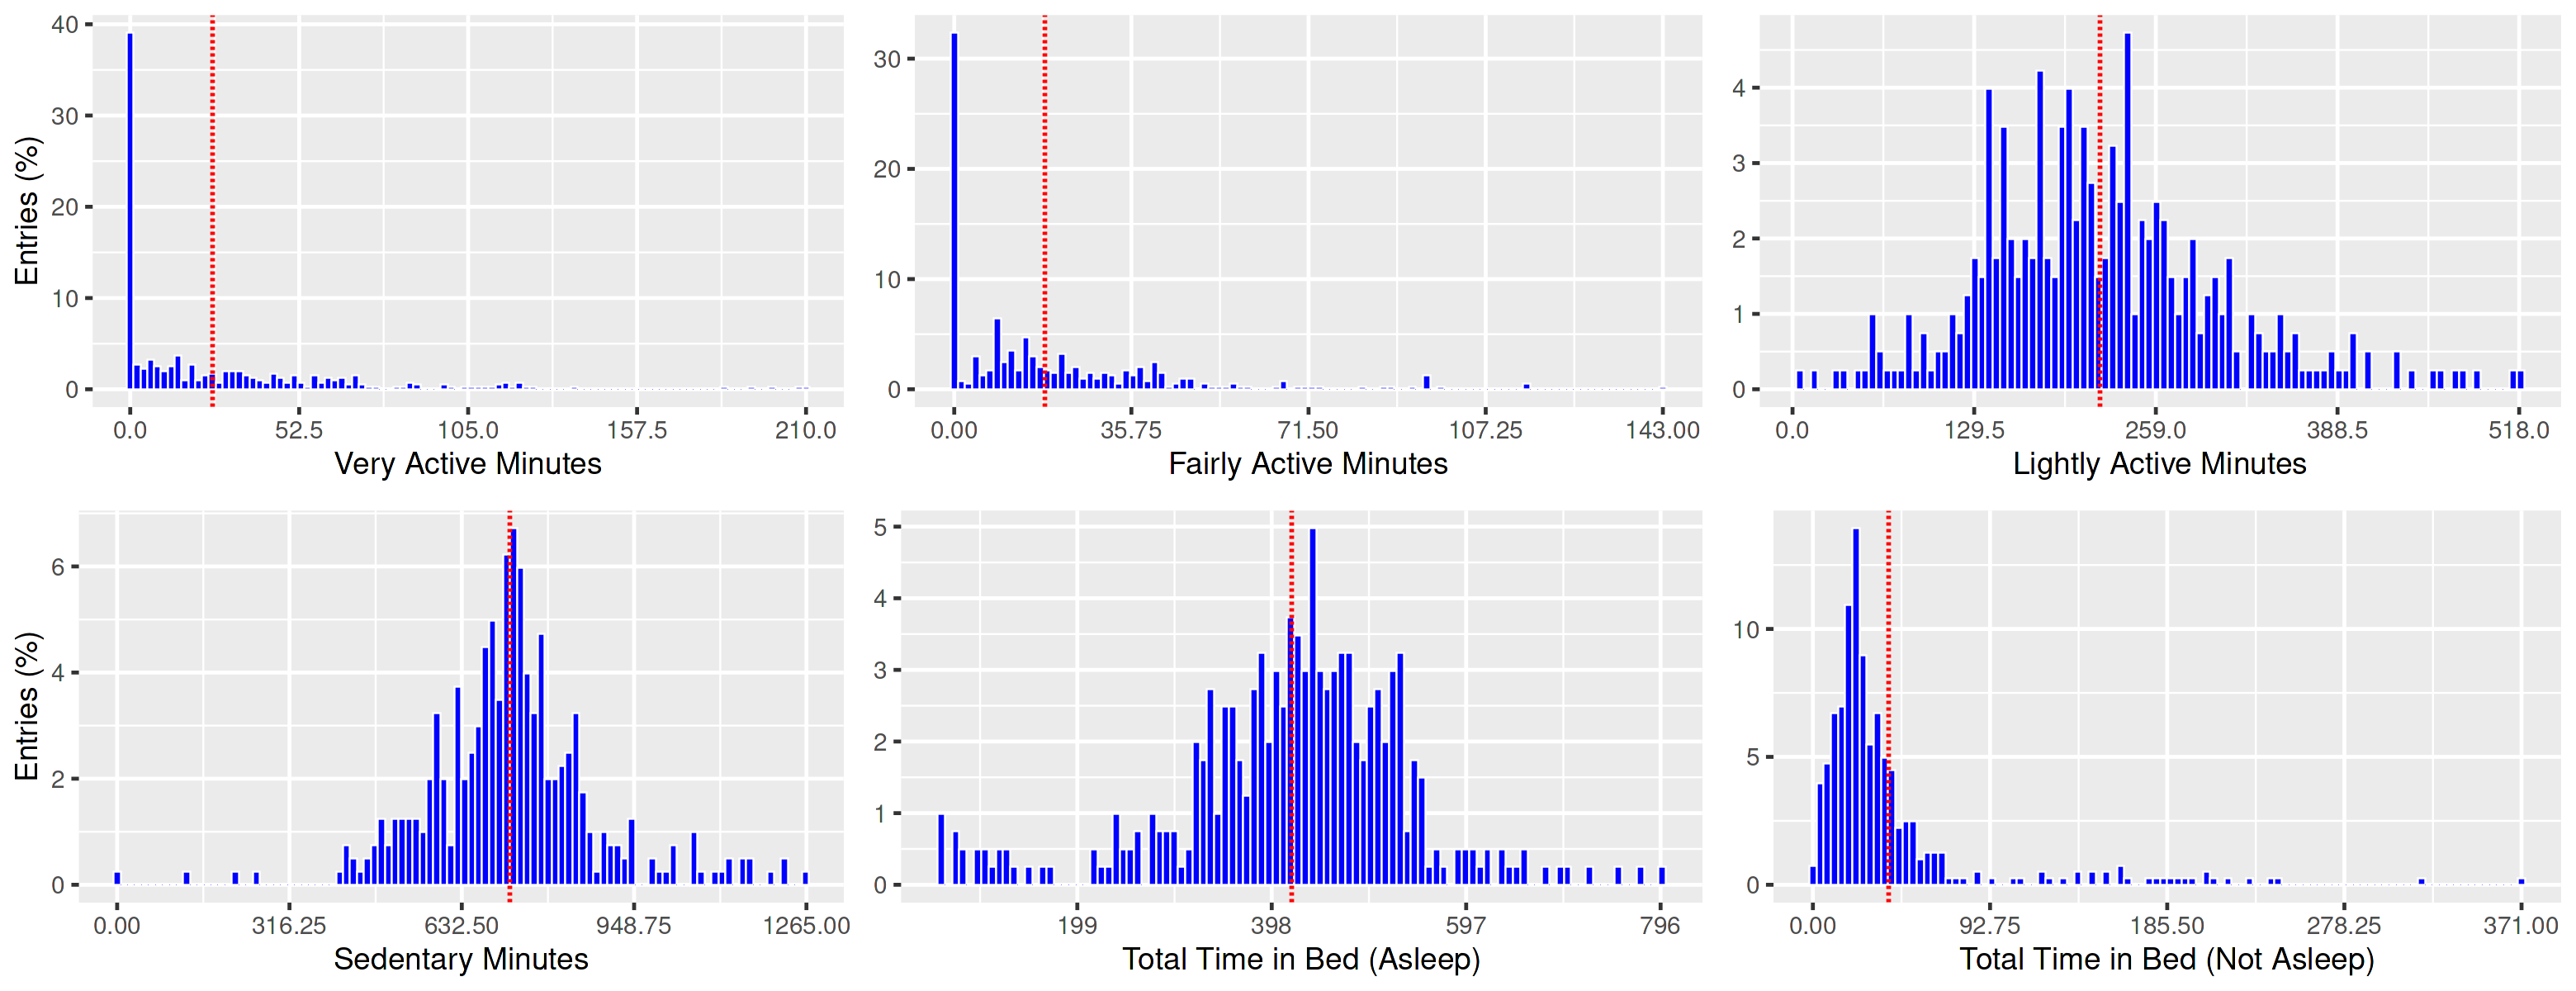

In [67]:
a <- ggplot(merged, aes(VeryActiveMinutes)) +
    geom_histogram(aes(y = (..count..) / sum(..count..) * 100), bins = 100, fill = "blue", color = "white") +
    geom_vline(aes(xintercept = mean(VeryActiveMinutes)), color = "red", linetype = "dashed", size = 1.2) +
    scale_x_continuous(breaks = seq(0, max(merged$VeryActiveMinutes), by = max(merged$VeryActiveMinutes) / 4)) +
    labs(x = "Very Active Minutes", y = "Entries (%)", x = "VeryActiveMinutes") +
    theme_grey(base_size = 22)

b <- ggplot(merged, aes(FairlyActiveMinutes)) +
    geom_histogram(aes(y = (..count..) / sum(..count..) * 100), bins = 100, fill = "blue", color = "white") +
    geom_vline(aes(xintercept = mean(FairlyActiveMinutes)), color = "red", linetype = "dashed", size = 1.2) +
    scale_x_continuous(breaks = seq(0, max(merged$FairlyActiveMinutes), by = max(merged$FairlyActiveMinutes) / 4)) +
    labs(x = "Fairly Active Minutes", y = "Entries (%)") +
    theme_grey(base_size = 22) +
    theme(axis.title.y = element_blank())

c <- ggplot(merged, aes(LightlyActiveMinutes)) +
    geom_histogram(aes(y = (..count..) / sum(..count..) * 100), bins = 100, fill = "blue", color = "white") +
    geom_vline(aes(xintercept = mean(LightlyActiveMinutes)), color = "red", linetype = "dashed", size = 1.2) +
    scale_x_continuous(breaks = seq(0, max(merged$LightlyActiveMinutes), by = max(merged$LightlyActiveMinutes) / 4)) +
    labs(x = "Lightly Active Minutes", y = "Entries (%)") +
    theme_grey(base_size = 22) +
    theme(axis.title.y = element_blank())

d <- ggplot(merged, aes(SedentaryMinutes)) +
    geom_histogram(aes(y = (..count..) / sum(..count..) * 100), bins = 100, fill = "blue", color = "white") +
    geom_vline(aes(xintercept = mean(SedentaryMinutes)), color = "red", linetype = "dashed", size = 1.2) +
    scale_x_continuous(breaks = seq(0, max(merged$SedentaryMinutes), by = max(merged$SedentaryMinutes) / 4)) +
    labs(x = "Sedentary Minutes", y = "Entries (%)") +
    theme_grey(base_size = 22)

e <- ggplot(merged, aes(TotalMinutesAsleep)) +
    geom_histogram(aes(y = (..count..) / sum(..count..) * 100), bins = 100, fill = "blue", color = "white") +
    geom_vline(aes(xintercept = mean(TotalMinutesAsleep)), color = "red", linetype = "dashed", size = 1.2) +
    scale_x_continuous(breaks = seq(0, max(merged$TotalMinutesAsleep), by = max(merged$TotalMinutesAsleep) / 4)) +
    labs(x = "Total Time in Bed (Asleep)", y = "Entries (%)") +
    theme_grey(base_size = 22) +
    theme(axis.title.y = element_blank())

f <- ggplot(merged, aes(TotalTimeInBedNotAsleep)) +
    geom_histogram(aes(y = (..count..) / sum(..count..) * 100), bins = 100, fill = "blue", color = "white") +
    geom_vline(aes(xintercept = mean(TotalTimeInBedNotAsleep)), color = "red", linetype = "dashed", size = 1.2) +
    scale_x_continuous(breaks = seq(0, max(merged$TotalTimeInBedNotAsleep), by = max(merged$TotalTimeInBedNotAsleep) / 4)) +
    labs(x = "Total Time in Bed (Not Asleep)", y = "Entries (%)") +
    theme_grey(base_size = 22) +
    theme(axis.title.y = element_blank())

options(repr.plot.width = 26, repr.plot.height = 10)

plot_times_all <- plot_grid(a, b, c, d, e, f, ncol = 3)
plot_times_all

While most activities follow a fairly normal distribution, the `VeryActiveMinutes` and `FairlyActiveMinutes` variables show a significant number of zeros. Around 40% of users do not engage in any very active minutes, and nearly 35% of users record no fairly active minutes. 

In [68]:
# Sum the total minutes for each activity type
total_minutes <- colSums(merged[, c("VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", 
                                    "SedentaryMinutes", "TotalMinutesAsleep", "TotalTimeInBedNotAsleep")], 
                         na.rm = TRUE)

# Create a summary data frame with the activity type and total minutes
activity_summary <- data.frame(row.names = NULL,
  ActivityType = c("Very Active", "Fairly Active", "Lightly Active", 
                   "Sedentary", "Asleep", "Time in Bed Not Asleep"),
  TotalMinutes = total_minutes
                              )

# Calculate the percentage for each activity type
activity_summary$Percentage <- round((activity_summary$TotalMinutes / sum(activity_summary$TotalMinutes)) * 100, 1)

activity_summary[,-2]


ActivityType,Percentage
<chr>,<dbl>
Very Active,1.8
Fairly Active,1.3
Lightly Active,15.2
Sedentary,50.0
Asleep,29.0
Time in Bed Not Asleep,2.7


When all the user activities for each logged day is summed in a pivot table, we observe very little highly active time spent on average on a given day. The sleep times look fairly normal while sedentary time is slightly above the average sedentary time for Canadian adults.

> **Observed sedentary time: 50%**

> **Canadian average: ~40%**


-------------------------


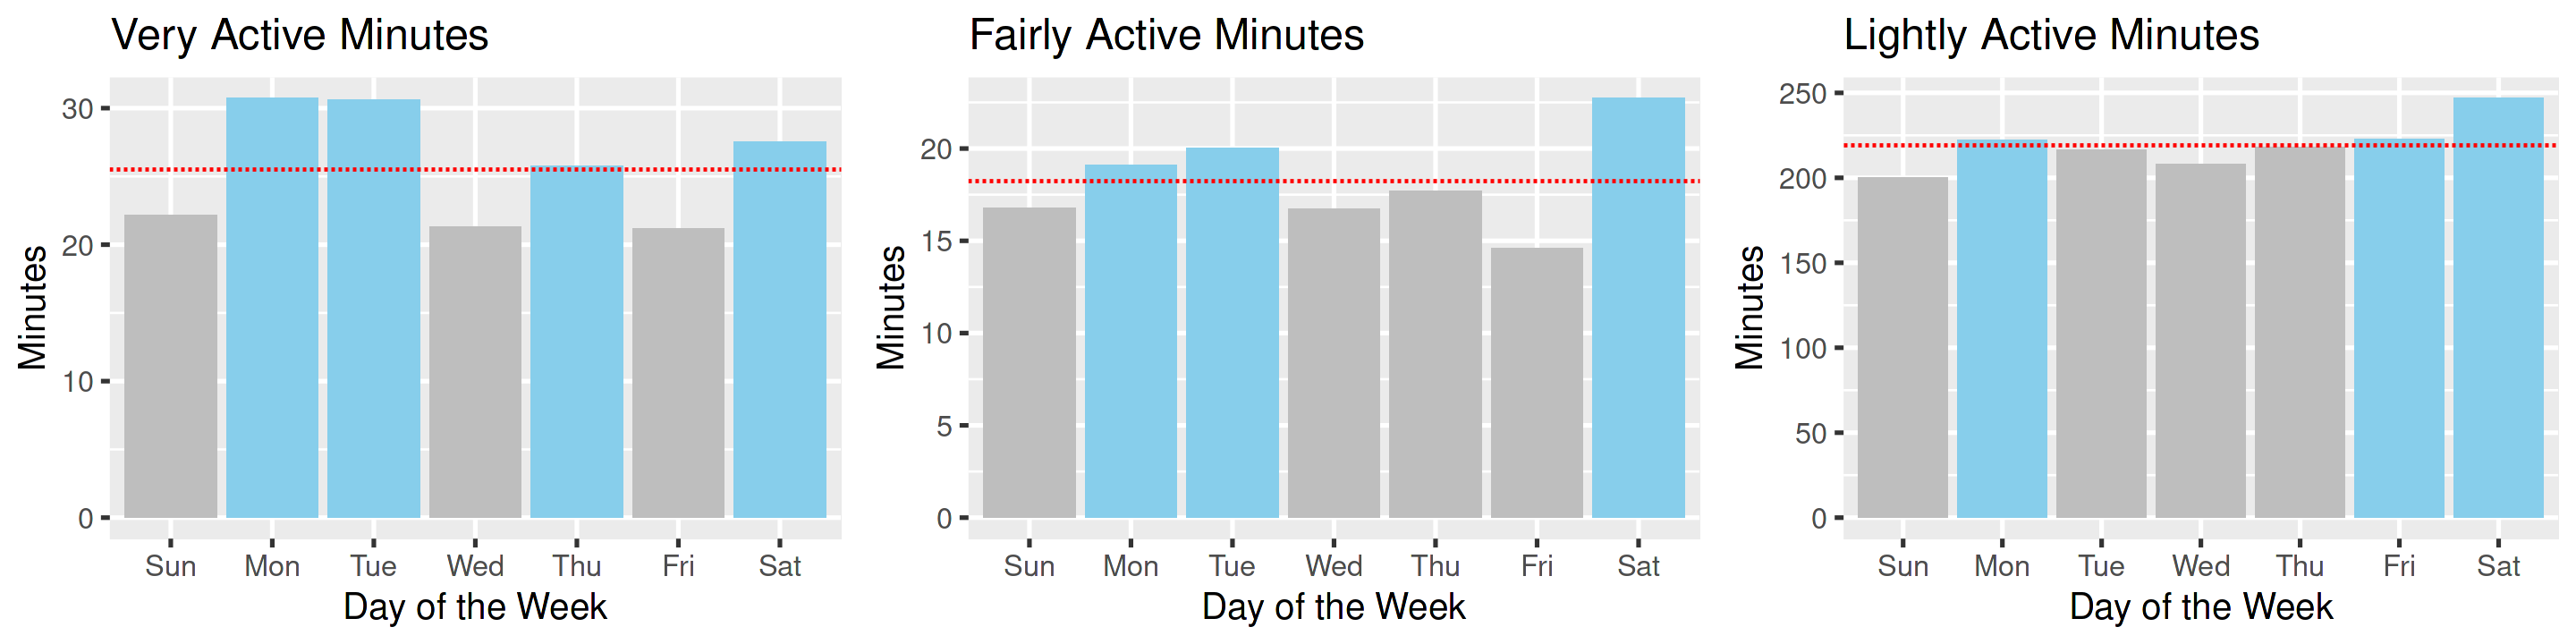


-------------------------


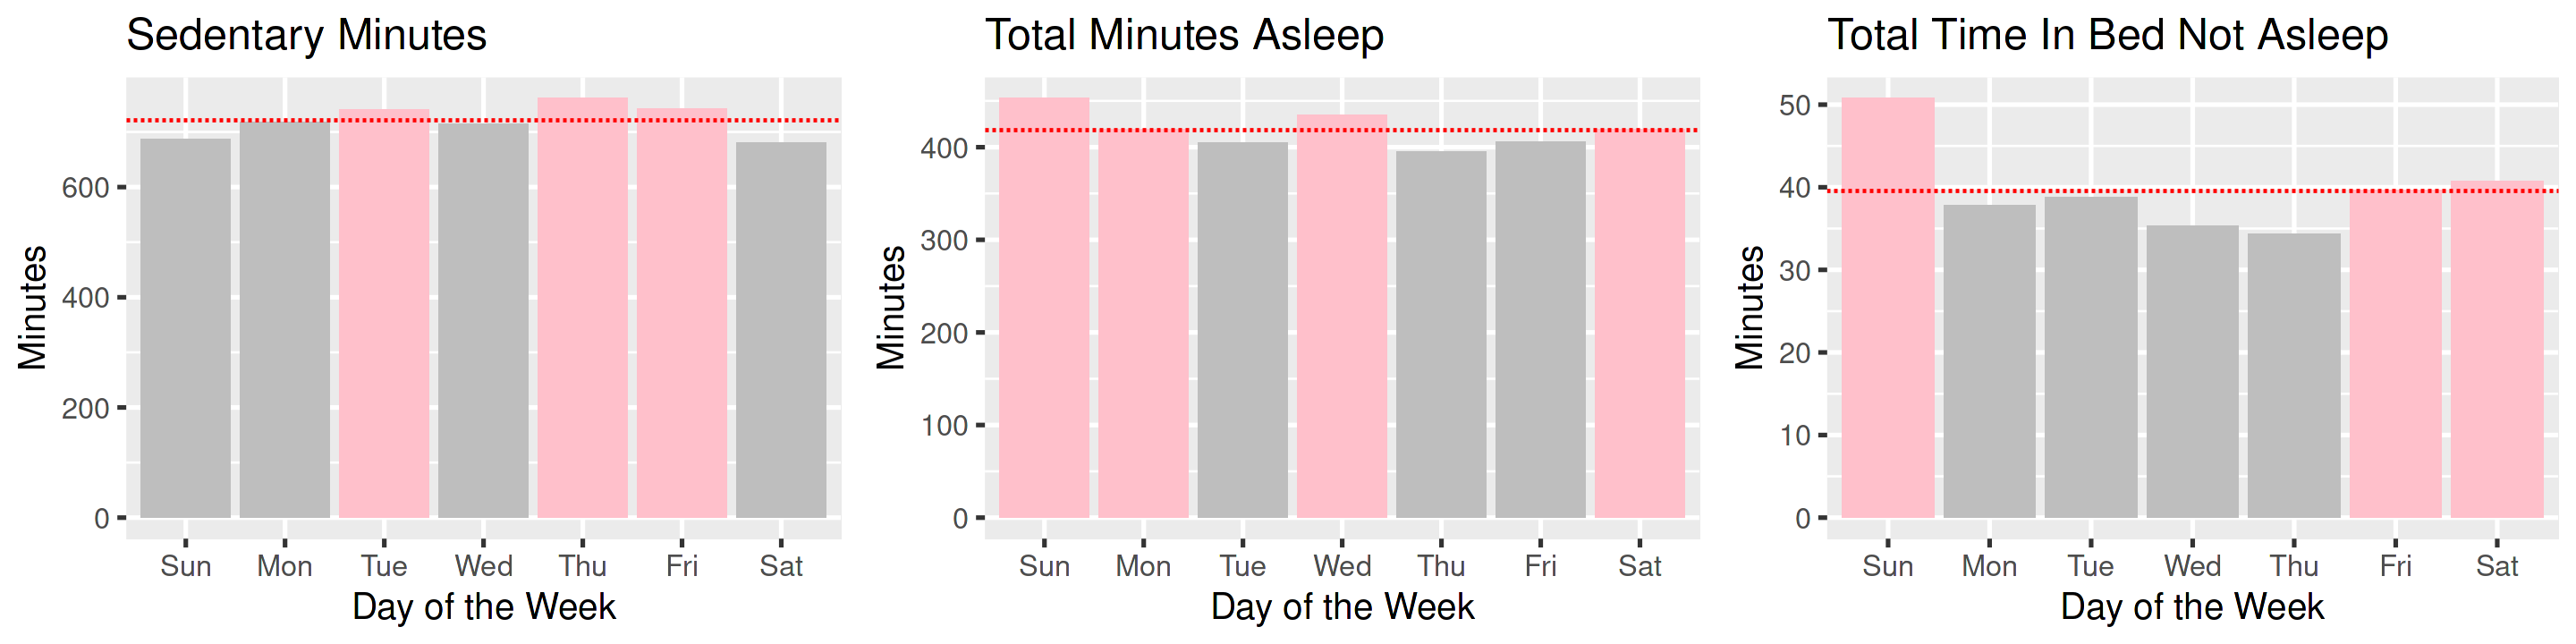

In [69]:
library(gridExtra)

options(repr.plot.width = 24, repr.plot.height = 6)

# Group 1: Columns 1 to 3
plots_group_1 <- list()
for (col in columns[1:3]) {
  col_mean <- mean(merged[[col]], na.rm = TRUE)
  
  # Create a summarized dataset for coloring
  summary_data <- merged %>%
    group_by(DayOfWeek) %>%
    summarise(mean_value = mean(.data[[col]], na.rm = TRUE)) %>%
    mutate(color = ifelse(mean_value > col_mean, "above", "below"))
  
  p <- ggplot(summary_data, aes(x = DayOfWeek, y = mean_value, fill = color)) +
    geom_bar(stat = "identity", show.legend = FALSE) +  # Hide legend
    scale_fill_manual(values = c("above" = "skyblue", "below" = "gray")) +
    geom_hline(yintercept = col_mean, linetype = "dashed", color = "red", size = 1) + 
    labs(title = gsub("([a-z])([A-Z])", "\\1 \\2", col),
         x = "Day of the Week",
         y = "Minutes") +
    theme_minimal() +
    theme_grey(base_size = 24)
  
  plots_group_1[[col]] <- p
}

# Arrange the first group of plots side by side
grid.arrange(grobs = plots_group_1, ncol = 3)

cat("\n-------------------------\n")

# Group 2: Columns 4, 5, and 7
plots_group_2 <- list()
for (col in columns[c(4, 5, 7)]) {
  col_mean <- mean(merged[[col]], na.rm = TRUE)
  
  # Create a summarized dataset for coloring
  summary_data <- merged %>%
    group_by(DayOfWeek) %>%
    summarise(mean_value = mean(.data[[col]], na.rm = TRUE)) %>%
    mutate(color = ifelse(mean_value > col_mean, "above", "below"))
  
  p <- ggplot(summary_data, aes(x = DayOfWeek, y = mean_value, fill = color)) +
    geom_bar(stat = "identity", show.legend = FALSE) +  # Hide legend
    scale_fill_manual(values = c("above" = "pink", "below" = "gray")) +
    geom_hline(yintercept = col_mean, linetype = "dashed", color = "red", size = 1) + 
    labs(title = gsub("([a-z])([A-Z])", "\\1 \\2", col),
         x = "Day of the Week",
         y = "Minutes") +
    theme_minimal() +
    theme_grey(base_size = 24)
  
  plots_group_2[[col]] <- p
}

# Arrange the second group of plots side by side
grid.arrange(grobs = plots_group_2, ncol = 3)

cat("\n-------------------------\n")


Users generally rest on Sundays, with lower activity levels and more time spent in bed. This rest day appears to recharge users for higher intensity activities on Mondays and Tuesdays, followed by a mid-week rest on Wednesday. Thursdays and Fridays also tend to have lower activity levels, while Saturdays show an increase in very active pursuits, likely in anticipation of resting again on Sunday.

To encourage more high-intensity workouts, notifications promoting active sessions should be sent on Mondays, Tuesdays, and Saturdays, while avoiding the rest-focused days of Sunday and Wednesday, helping users stay engaged without over-stimulating them or setting unrealistic activity expectations.

## 5. Aerobic Physical Activity Levels

According to CDC;

> Adults engaging in no leisure-time physical activity: **25.4%**

> Adults meeting minimum aerobic physical activity guideline—Moderate-intensity for ≥ 150 minutes/week, or vigorous-intensity for ≥ 75 minutes/week, or an equivalent combination in 2018: **54.2%**

> Adults meeting high aerobic physical activity guideline—Moderate-intensity for > 300 minutes/week, or vigorous-intensity for > 150 minutes/week, or an equivalent combination in 2018: **37.4%**

![](http://www.cdc.gov/physicalactivity/downloads/trends-in-the-prevalence-of-physical-activity-508.pdf)

In [70]:
minimum_aerobic_p <-  merged %>%
    group_by(Id, Week) %>%
    summarise(light_mean = mean(LightlyActiveMinutes),
              fair_mean = mean(FairlyActiveMinutes),
              very_mean = mean(VeryActiveMinutes)
             ) %>%
    group_by(Id) %>%
    summarise(light_weekly_mean = mean(light_mean),
              fairly_weekly_mean = mean(fair_mean),
              very_weekly_mean = mean(very_mean)
             ) %>%
    mutate(moderate_weekly_mean = light_weekly_mean + fairly_weekly_mean) %>%
    select(-c(light_weekly_mean, fairly_weekly_mean)) %>%
    mutate(total_equivalent_minutes = very_weekly_mean * 2 + moderate_weekly_mean) %>%
    arrange(desc(total_equivalent_minutes)) %>%
    filter(total_equivalent_minutes > 150) %>%
    nrow() / length(unique(merged$Id)) * 100

high_aerobic_p <-  merged %>%
    group_by(Id, Week) %>%
    summarise(light_sum = sum(LightlyActiveMinutes),
              fair_sum = sum(FairlyActiveMinutes),
              very_sum = sum(VeryActiveMinutes),
              light_mean = mean(LightlyActiveMinutes),
              fair_mean = mean(FairlyActiveMinutes),
              very_mean = mean(VeryActiveMinutes)
             ) %>%
    group_by(Id) %>%
    summarise(light_weekly_mean = mean(light_mean),
              fairly_weekly_mean = mean(fair_mean),
              very_weekly_mean = mean(very_mean)
             ) %>%
    mutate(moderate_weekly_mean = light_weekly_mean + fairly_weekly_mean) %>%
    select(-c(light_weekly_mean, fairly_weekly_mean)) %>%
    mutate(total_equivalent_minutes = very_weekly_mean * 2 + moderate_weekly_mean) %>%
    arrange(desc(total_equivalent_minutes)) %>%
    filter(total_equivalent_minutes > 300) %>%
    nrow() / length(unique(merged$Id)) * 100

merged$TotalActiveTime <- rowSums(merged[, c("VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes")], 
                             na.rm = TRUE)

no_activity <- merged[merged$TotalActiveTime < 10, ]
no_activity_p <- length(unique(no_activity$Id)) / length(unique(merged$Id)) * 100


cat(paste0("Percentage of users engaging in no leisure-time physical activity: ", round(no_activity_p, 1), "%\n"))
cat(paste0("Percentage of users meeting minimum aerobic physical activity guideline: ", round(minimum_aerobic_p, 1), "%\n"))
cat(paste0("Percentage of users meeting high aerobic physical activity guideline: ", round(high_aerobic_p, 1), "%\n"))


`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Percentage of users engaging in no leisure-time physical activity: 4.2%
Percentage of users meeting minimum aerobic physical activity guideline: 91.7%
Percentage of users meeting high aerobic physical activity guideline: 29.2%


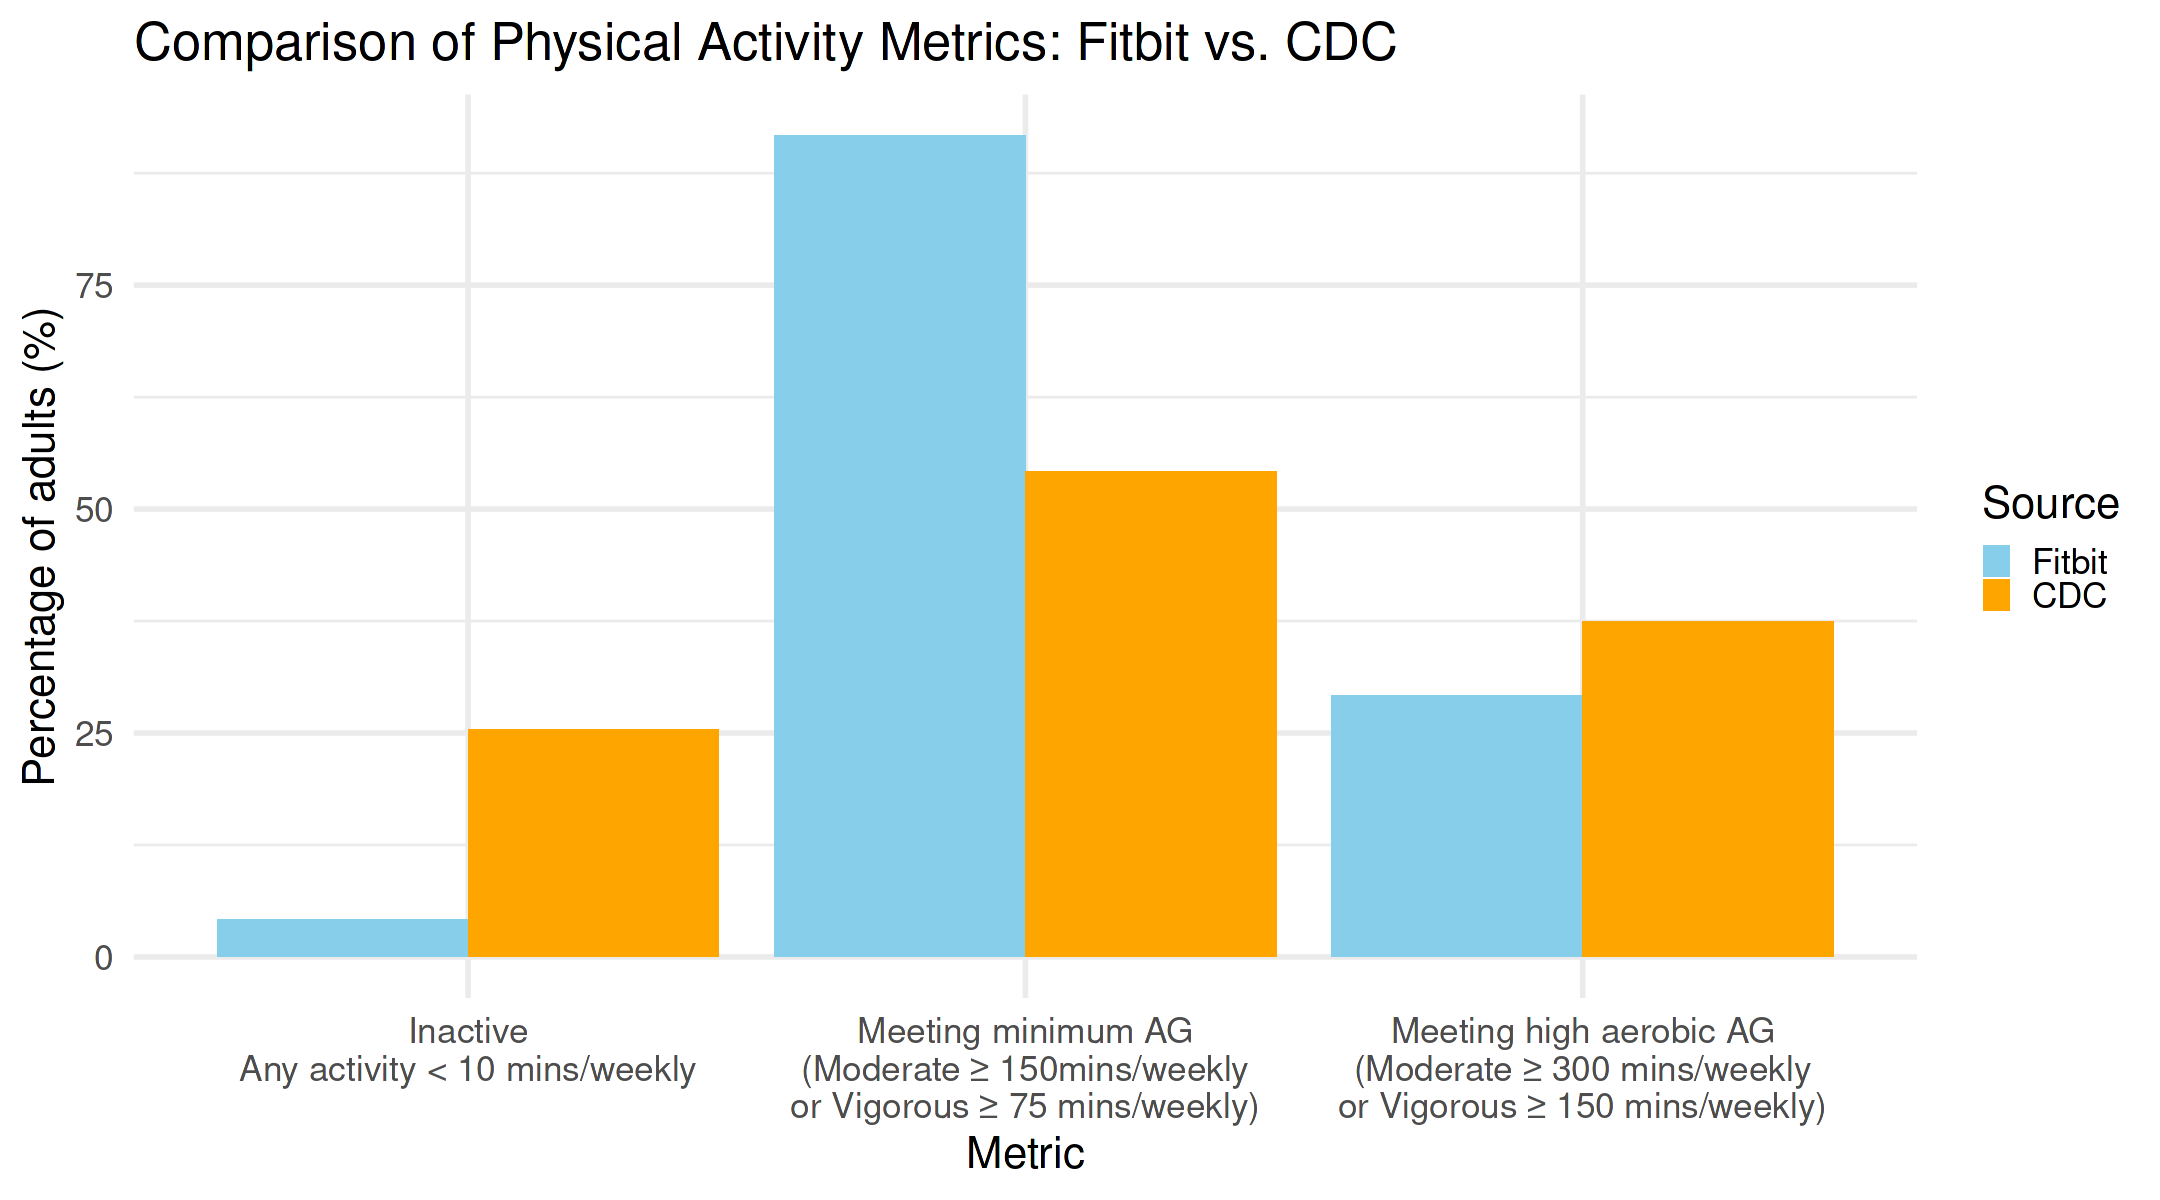

In [71]:
options(repr.plot.width = 18, repr.plot.height = 10)


data <- data.frame(
  Metric = c("Inactive\nAny activity < 10 mins/weekly", 
             "Meeting minimum AG\n(Moderate ≥ 150mins/weekly\nor Vigorous ≥ 75 mins/weekly)", 
             "Meeting high aerobic AG\n(Moderate ≥ 300 mins/weekly\nor Vigorous ≥ 150 mins/weekly)"),
  Fitbit = c(round(no_activity_p, 1), 
             round(minimum_aerobic_p, 1), 
             round(high_aerobic_p, 1)),
  CDC = c(25.4, 54.2, 37.4)
)

# Reshape the data for ggplot2
data_long <- data %>%
  pivot_longer(cols = c(Fitbit, CDC), 
               names_to = "Source", 
               values_to = "Percentage")

data_long$Metric <- factor(data_long$Metric, levels = c("Inactive\nAny activity < 10 mins/weekly",
             "Meeting minimum AG\n(Moderate ≥ 150mins/weekly\nor Vigorous ≥ 75 mins/weekly)", 
             "Meeting high aerobic AG\n(Moderate ≥ 300 mins/weekly\nor Vigorous ≥ 150 mins/weekly)"))

data_long$Source <- factor(data_long$Source, levels = c("Fitbit", "CDC"))

# Create the bar plot
ggplot(data_long, aes(x = Metric, y = Percentage, fill = Source)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = c("Fitbit" = "skyblue", "CDC" = "orange")) +
  labs(title = "Comparison of Physical Activity Metrics: Fitbit vs. CDC",
       x = "Metric",
       y = "Percentage of adults (%)") +
  theme_minimal(base_size = 26)

**1. No Leisure-Time Physical Activity:** According to the CDC, 25.4% of adults engage in no leisure-time physical activity. In contrast, the Fitbit data shows that 4.2% of users fall into this category. This suggests that Fitbit users in this sample have a significantly lower rate of inactivity compared to the general adult population.

**2. Meeting Minimum Aerobic Physical Activity Guidelines:** The CDC reports that 54.2% of adults meet the minimum aerobic physical activity guideline (150 minutes of moderate-intensity or 75 minutes of vigorous-intensity activity per week). In the Fitbit data, a much higher percentage — 91.7% — of users meet this minimum guideline. 

**3. Meeting High Aerobic Physical Activity Guidelines:** The CDC data shows that 37.4% of adults meet the high aerobic activity guidelines (300 minutes of moderate or 150 minutes of vigorous activity per week). However, in the Fitbit data, only 29.2% of users meet this higher threshold. This lower proportion among Fitbit users may suggest that, while many users are active enough to meet the minimum guidelines, fewer are reaching the intensity levels required for high aerobic activity.

## 6. How does active time and sitting time affect calories burnt?

Here we investigate the correlation of active time spent with caloires burnt, and we further analyze the relationship between different activity levels and how it effects the amount of caloires burnt (kcal) to drive more precise insights. 

In [72]:
merged$TotalActiveTime <- rowSums(merged[, c("VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes")], na.rm = TRUE)
str(merged)

'data.frame':	402 obs. of  17 variables:
 $ Id                     : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ Date                   : Date, format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps             : int  13162 10735 9762 12669 9705 15506 10544 9819 14371 10039 ...
 $ VeryActiveMinutes      : int  25 21 29 36 38 50 28 19 41 39 ...
 $ FairlyActiveMinutes    : int  13 19 34 10 20 31 12 8 21 5 ...
 $ LightlyActiveMinutes   : int  328 217 209 221 164 264 205 211 262 238 ...
 $ SedentaryMinutes       : int  728 776 726 773 539 775 818 838 732 709 ...
 $ Calories               : int  1985 1797 1745 1863 1728 2035 1786 1775 1949 1788 ...
 $ TotalSleepRecords      : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep     : int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed         : int  346 407 442 367 712 320 377 364 384 449 ...
 $ TotalTimeInBedNotAsleep: int  19 23 30 27 12 16 17 39 23 19 ...
 $ TotalLoggedTime        : num  1440 1440 1440 1407 1473 ...
 $ 

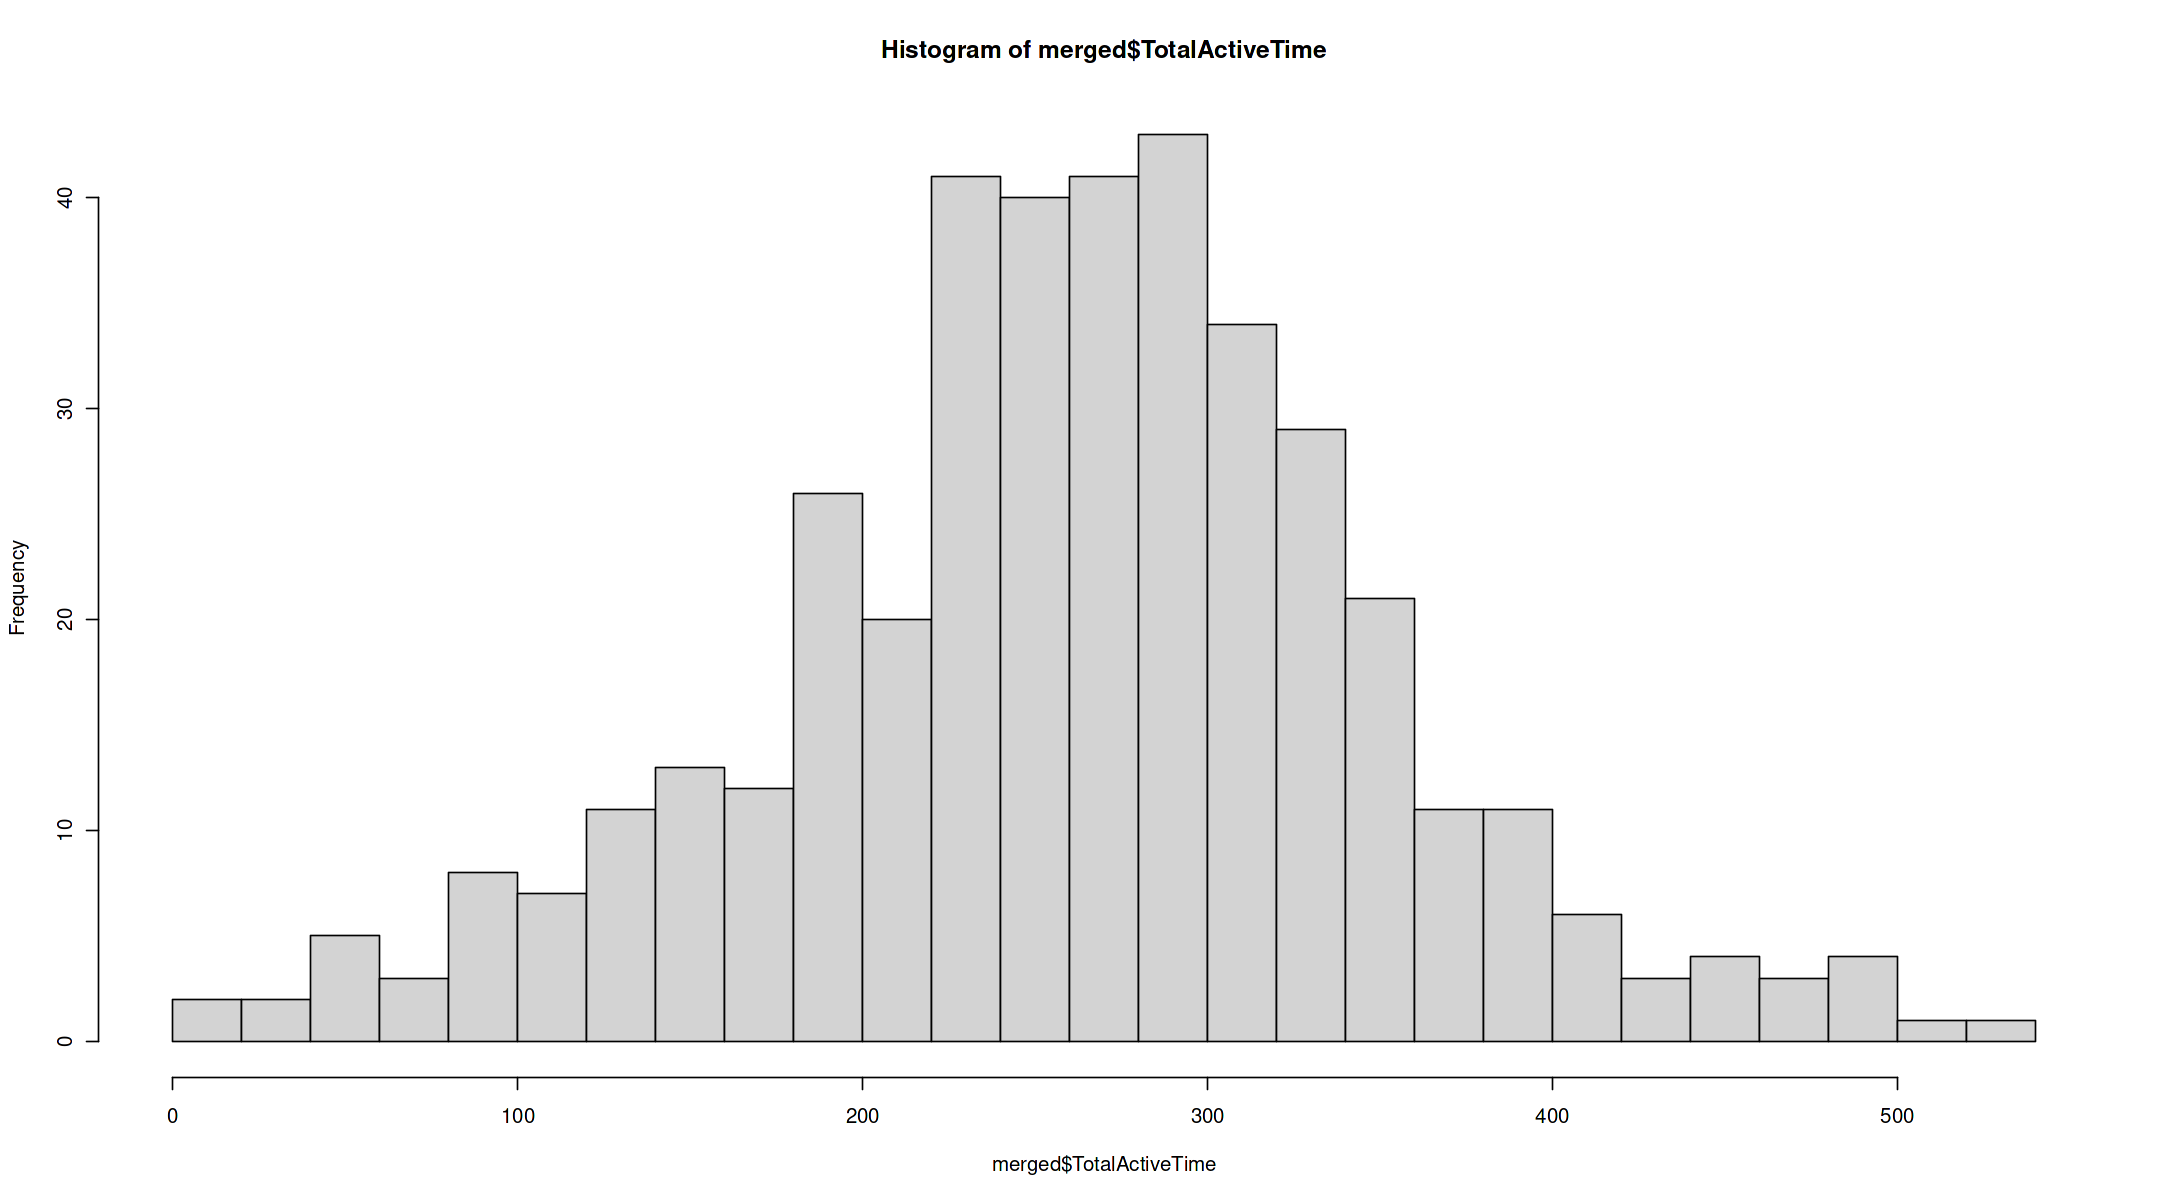

In [73]:
hist(merged$TotalActiveTime, breaks = 20)

In [74]:
mean(weight$BMI)

[1] 25.18522

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


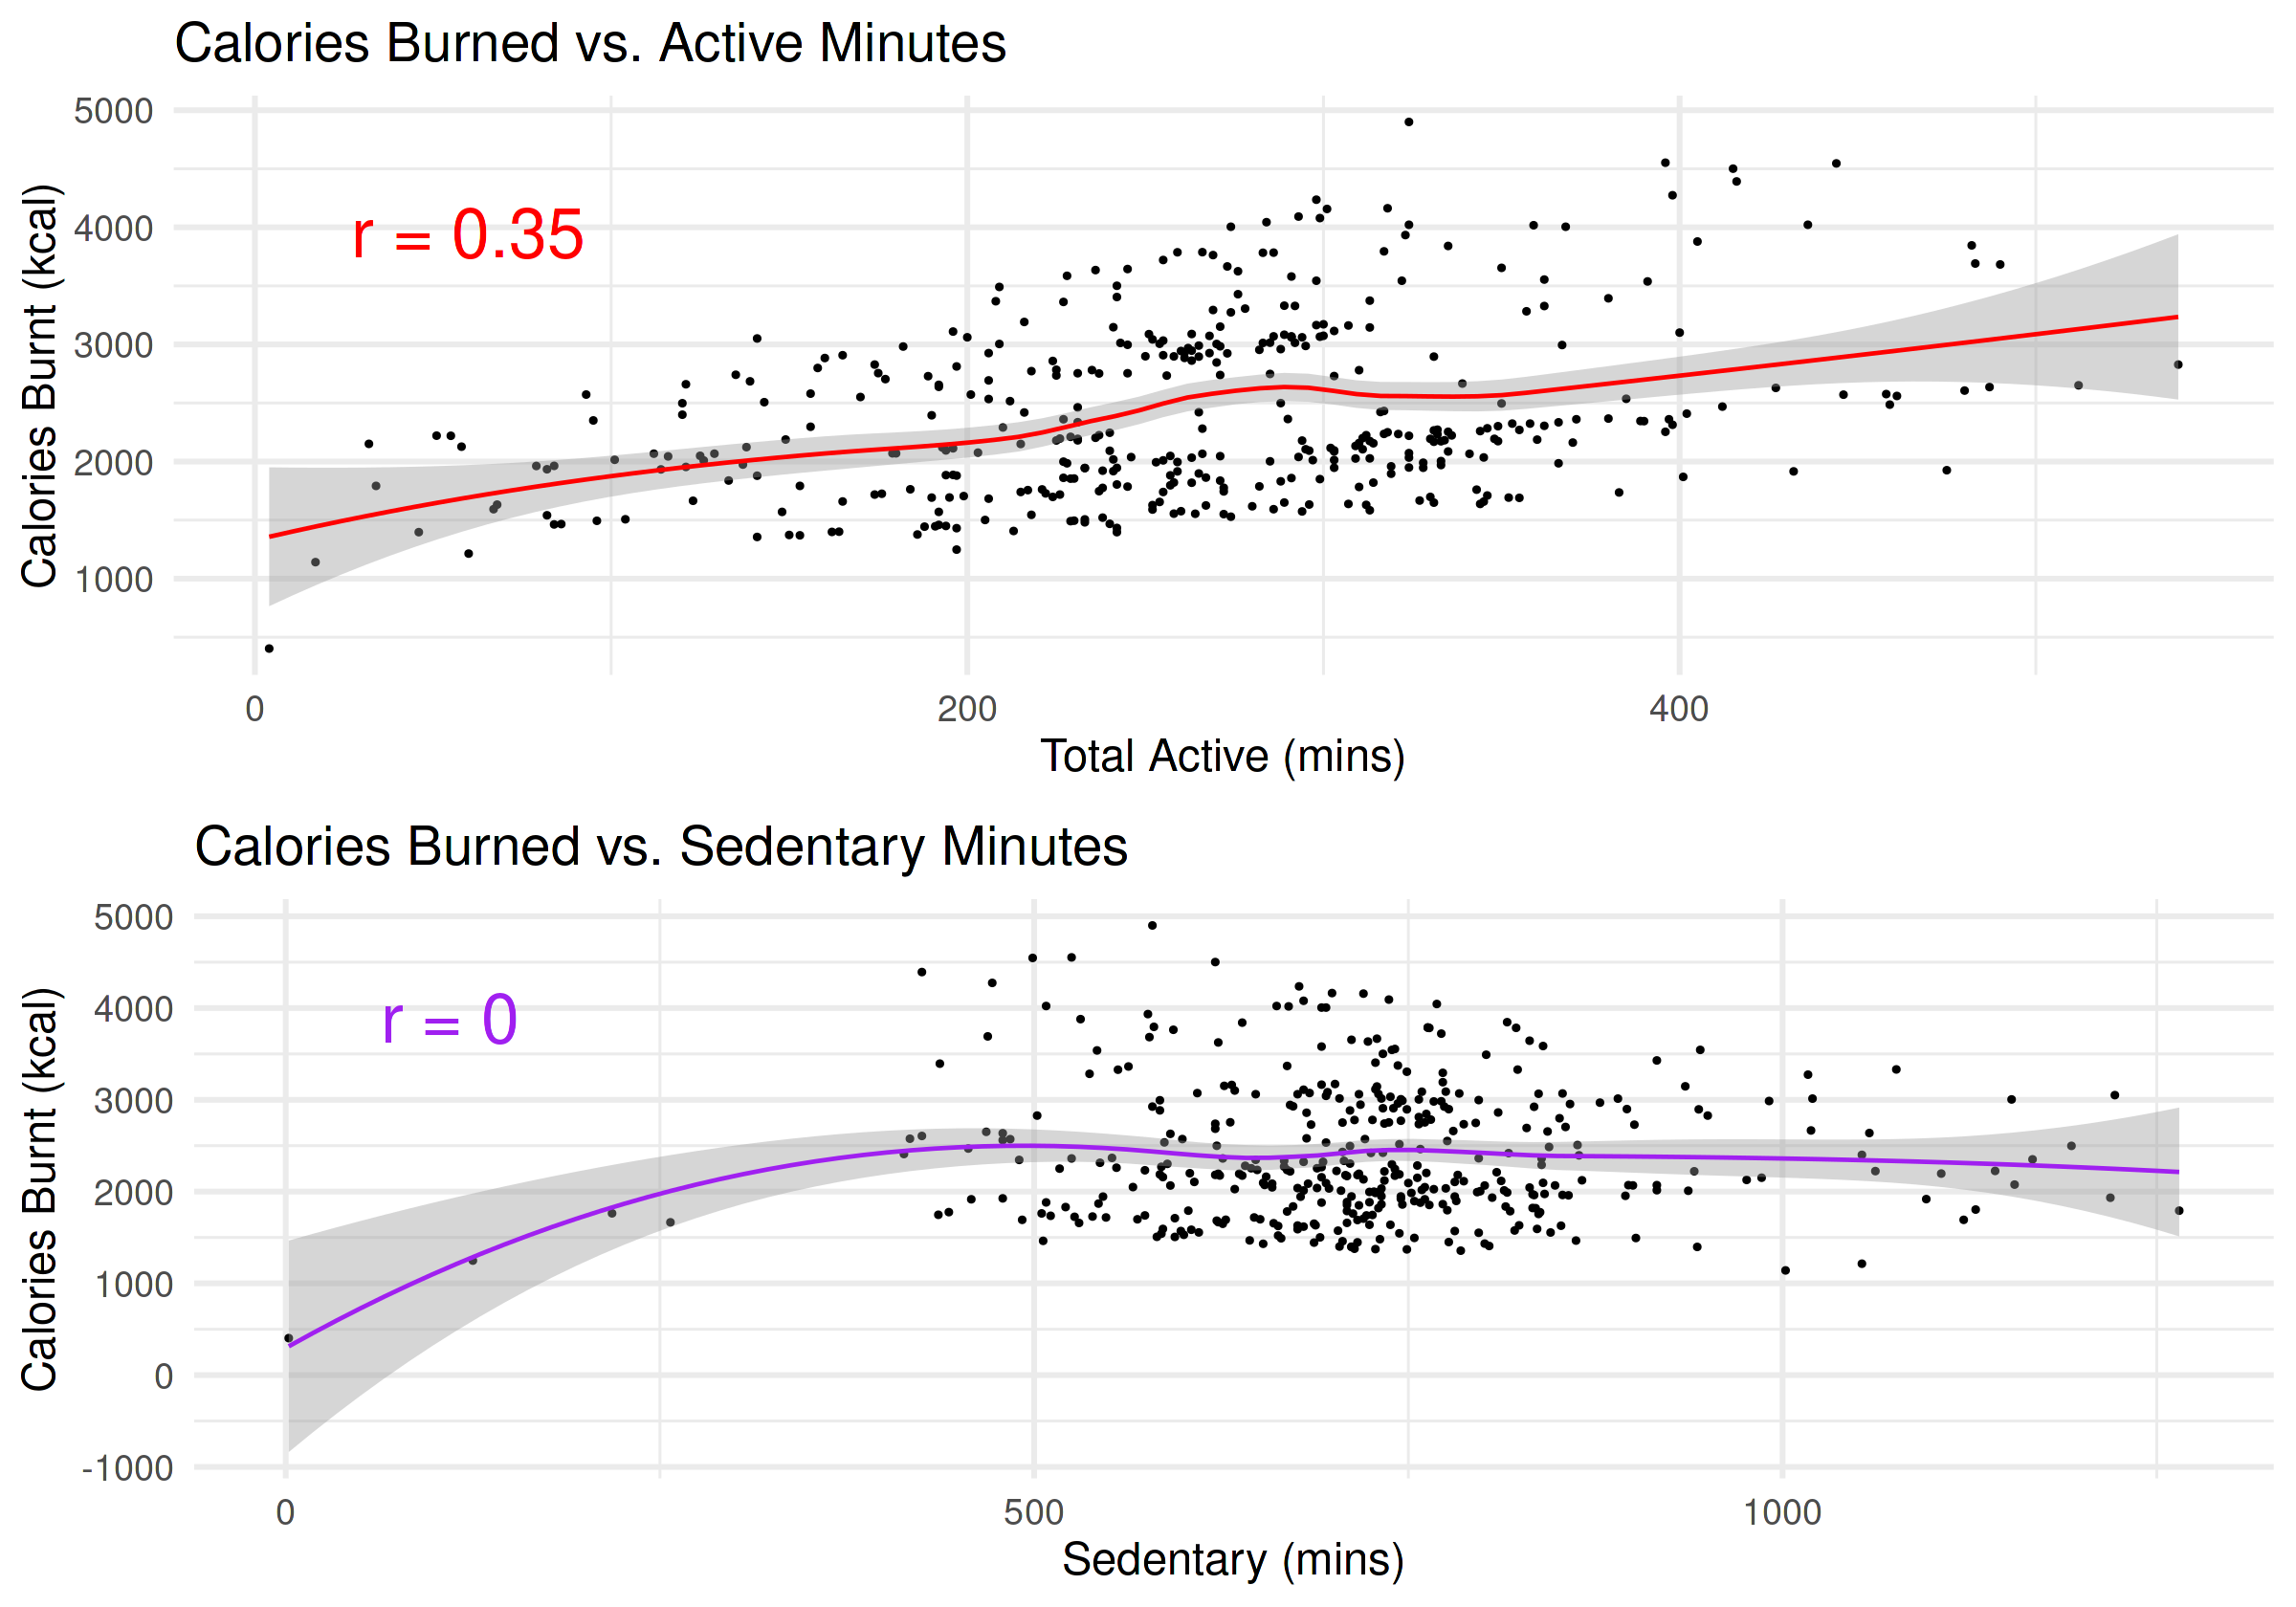

In [75]:
# texts
r_calories_act <- paste0("r = ", round(cor(merged$TotalActiveTime, merged$Calories), 2))
r_calories_sed <- paste0("r = ", round(cor(merged$SedentaryMinutes, merged$Calories), 2))

# x-axis
x_act <- (.05 * max(merged$TotalActiveTime))
x_sed <- (.05 * max(merged$SedentaryMinutes))

# y-axis
y_calories <- (.85 * max(merged$Calories))

options(repr.plot.width = 20, repr.plot.height = 14)

calories_active <- merged %>%
    ggplot(aes(TotalActiveTime, Calories)) +
    geom_point() +
    geom_smooth(method = "loess", color = "red") +
    labs(x="Total Active (mins)", y="Calories Burnt (kcal)", title="Calories Burned vs. Active Minutes") +
    annotate("text", x = x_act, y = y_calories, label = r_calories_act, color = "red", size = 15, hjust = 0, vjust = 1) +
    theme_minimal(base_size = 28)

calories_sed <- merged %>%
    ggplot(aes(SedentaryMinutes, Calories)) +
    geom_point() +
    geom_smooth(method = "loess", color = "purple") +
    labs(x="Sedentary (mins)", y="Calories Burnt (kcal)", title="Calories Burned vs. Sedentary Minutes") +
    annotate("text", x = x_sed, y = y_calories, label = r_calories_sed, color = "purple", size = 15, hjust = 0, vjust = 1) +
    theme_minimal(base_size = 28)

calories_all <- plot_grid(calories_active, calories_sed, ncol = 1)
calories_all

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


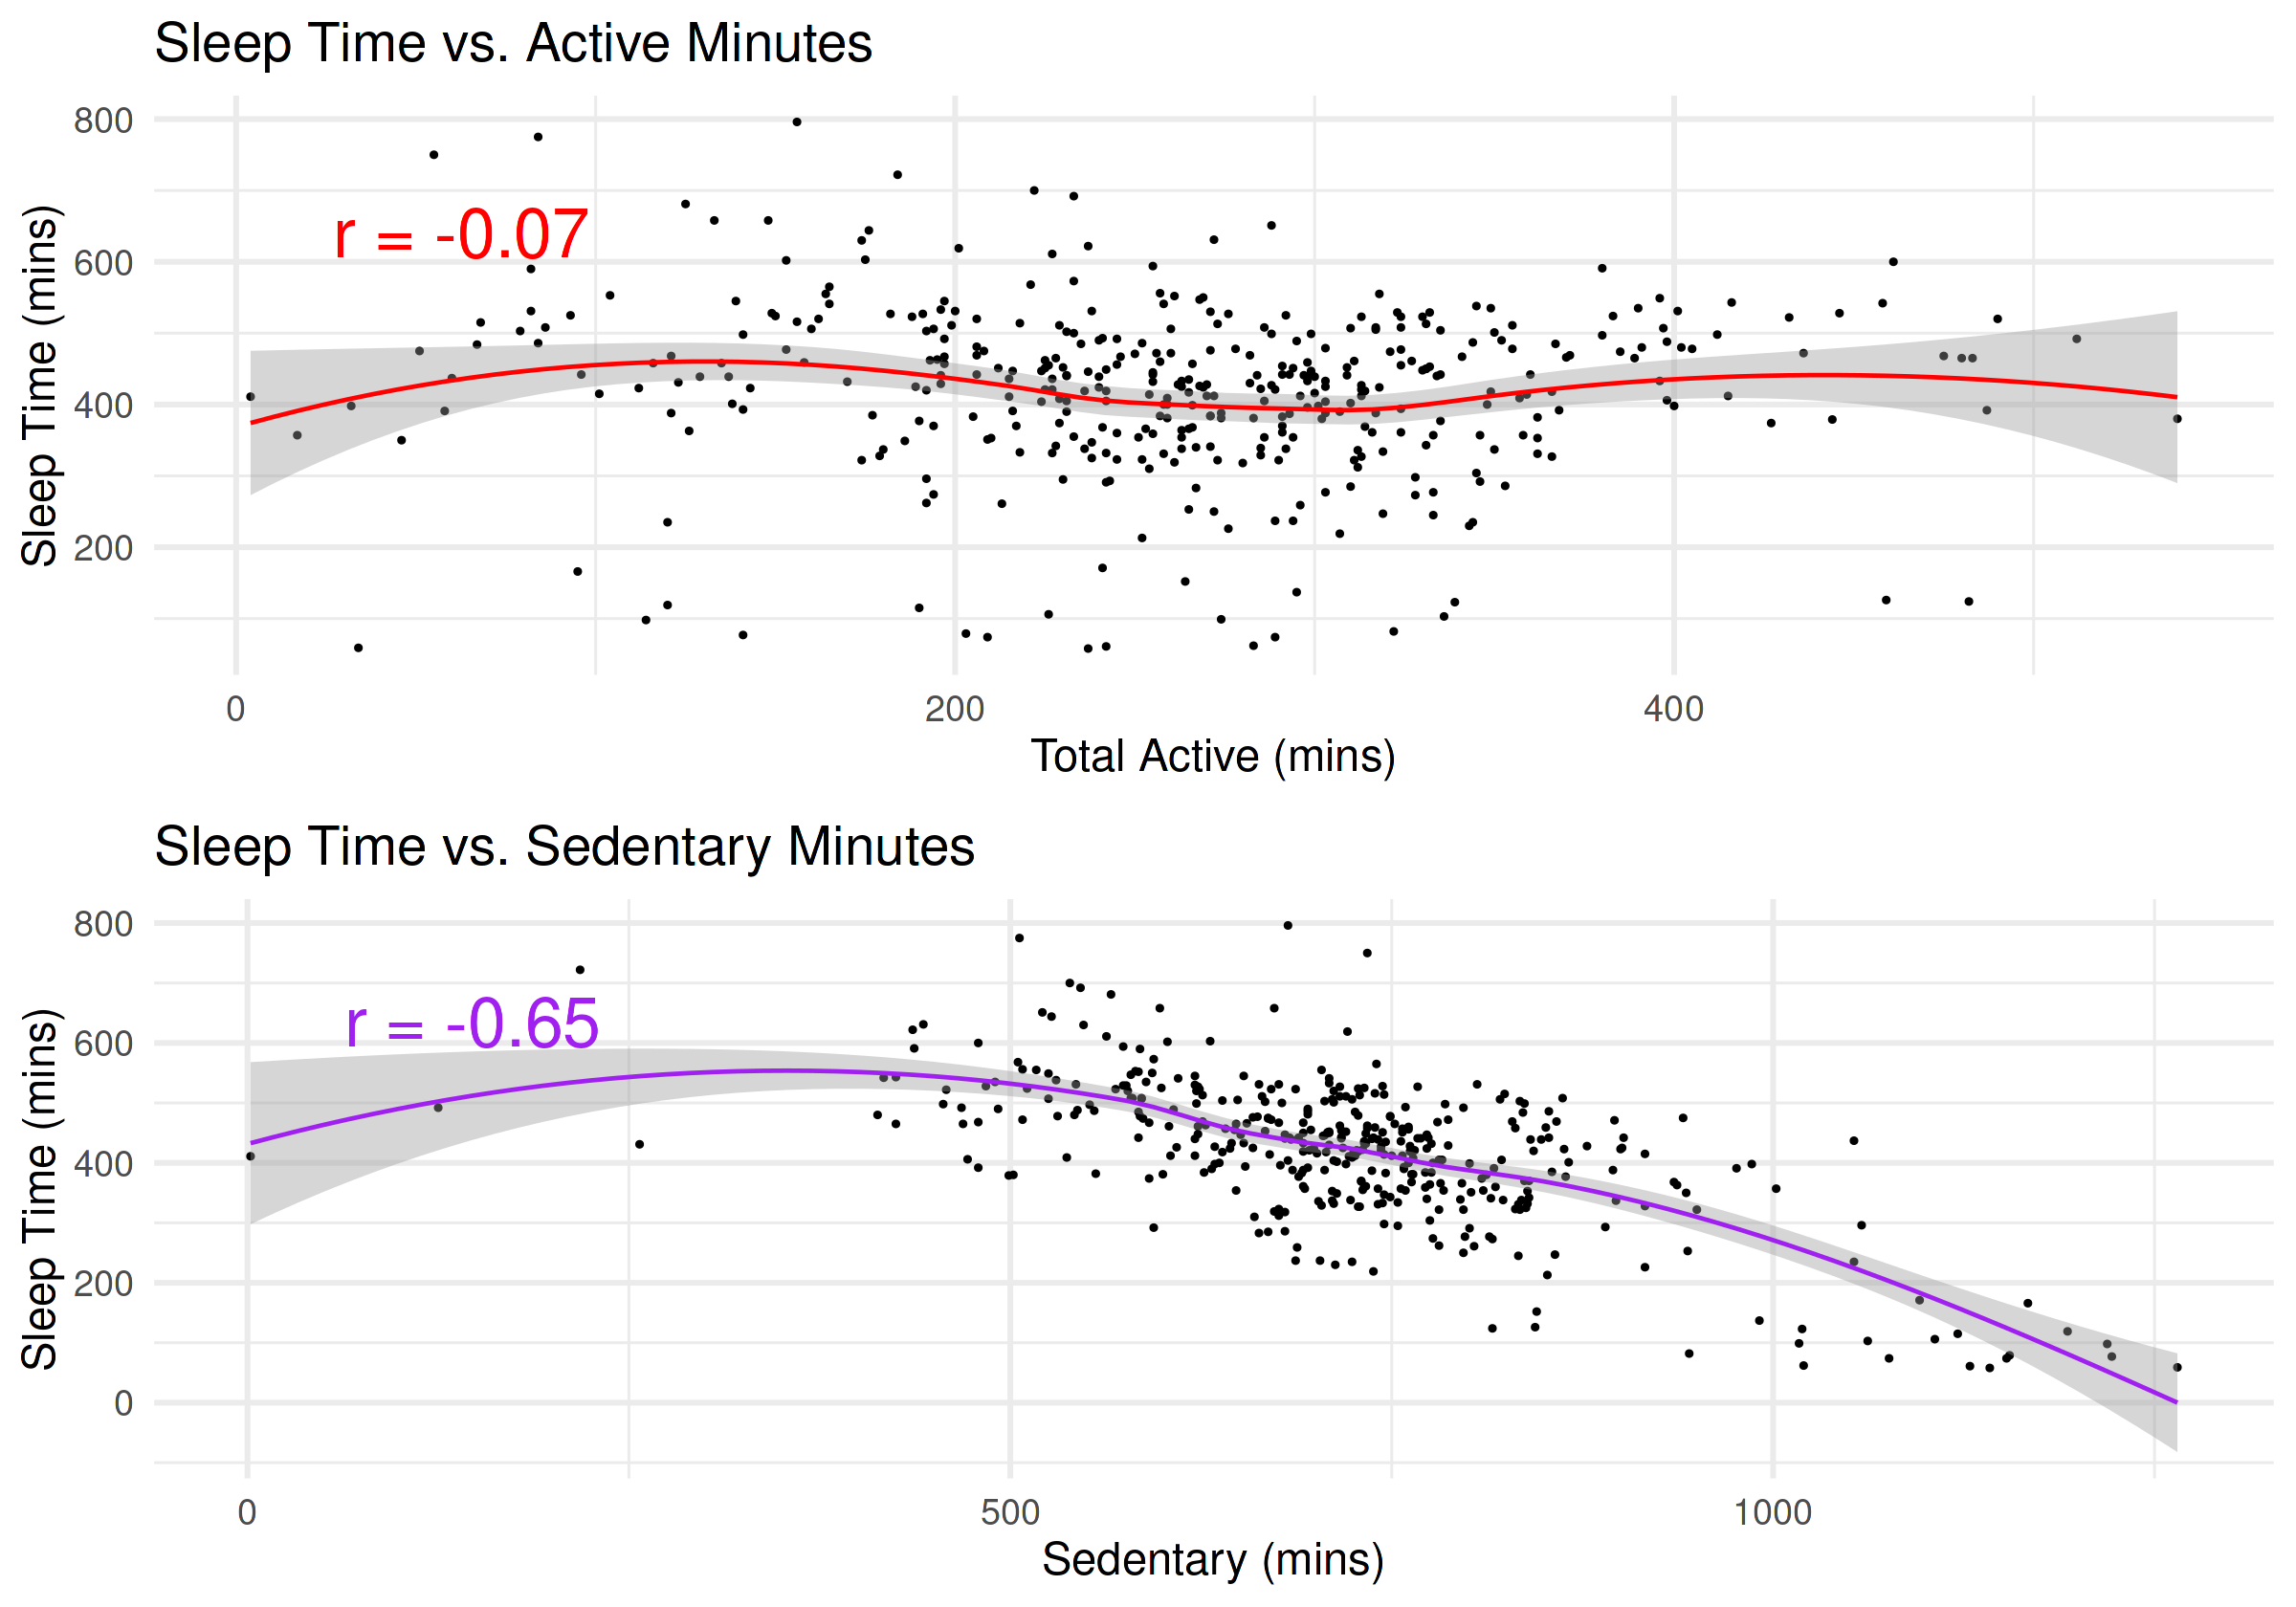

In [76]:
r_sleep_act <- paste0("r = ", round(cor(merged$TotalActiveTime, merged$TotalMinutesAsleep), 2))
r_sleep_sed <- paste0("r = ", round(cor(merged$SedentaryMinutes, merged$TotalMinutesAsleep), 2))

y_sleep <- (.85 * max(merged$TotalMinutesAsleep))

sleep_active <- merged %>%
    ggplot(aes(TotalActiveTime, TotalMinutesAsleep)) +
    geom_point() +
    geom_smooth(method = "loess", color = "red") +
    labs(x="Total Active (mins)", y="Sleep Time (mins)", title="Sleep Time vs. Active Minutes") +
    annotate("text", x = x_act, y = y_sleep, label = r_sleep_act, color = "red", size = 15, hjust = 0, vjust = 1) +
    theme_minimal(base_size = 28)

sleep_sed <- merged %>%
    ggplot(aes(SedentaryMinutes, TotalMinutesAsleep)) +
    geom_point() +
    geom_smooth(method = "loess", color = "purple") +
    labs(x="Sedentary (mins)", y="Sleep Time (mins)", title="Sleep Time vs. Sedentary Minutes") +
    annotate("text", x = x_sed, y = y_sleep, label = r_sleep_sed, color = "purple", size = 15, hjust = 0, vjust = 1) +
    theme_minimal(base_size = 28)

sleep_all <- plot_grid(sleep_active, sleep_sed, ncol = 1)
sleep_all

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


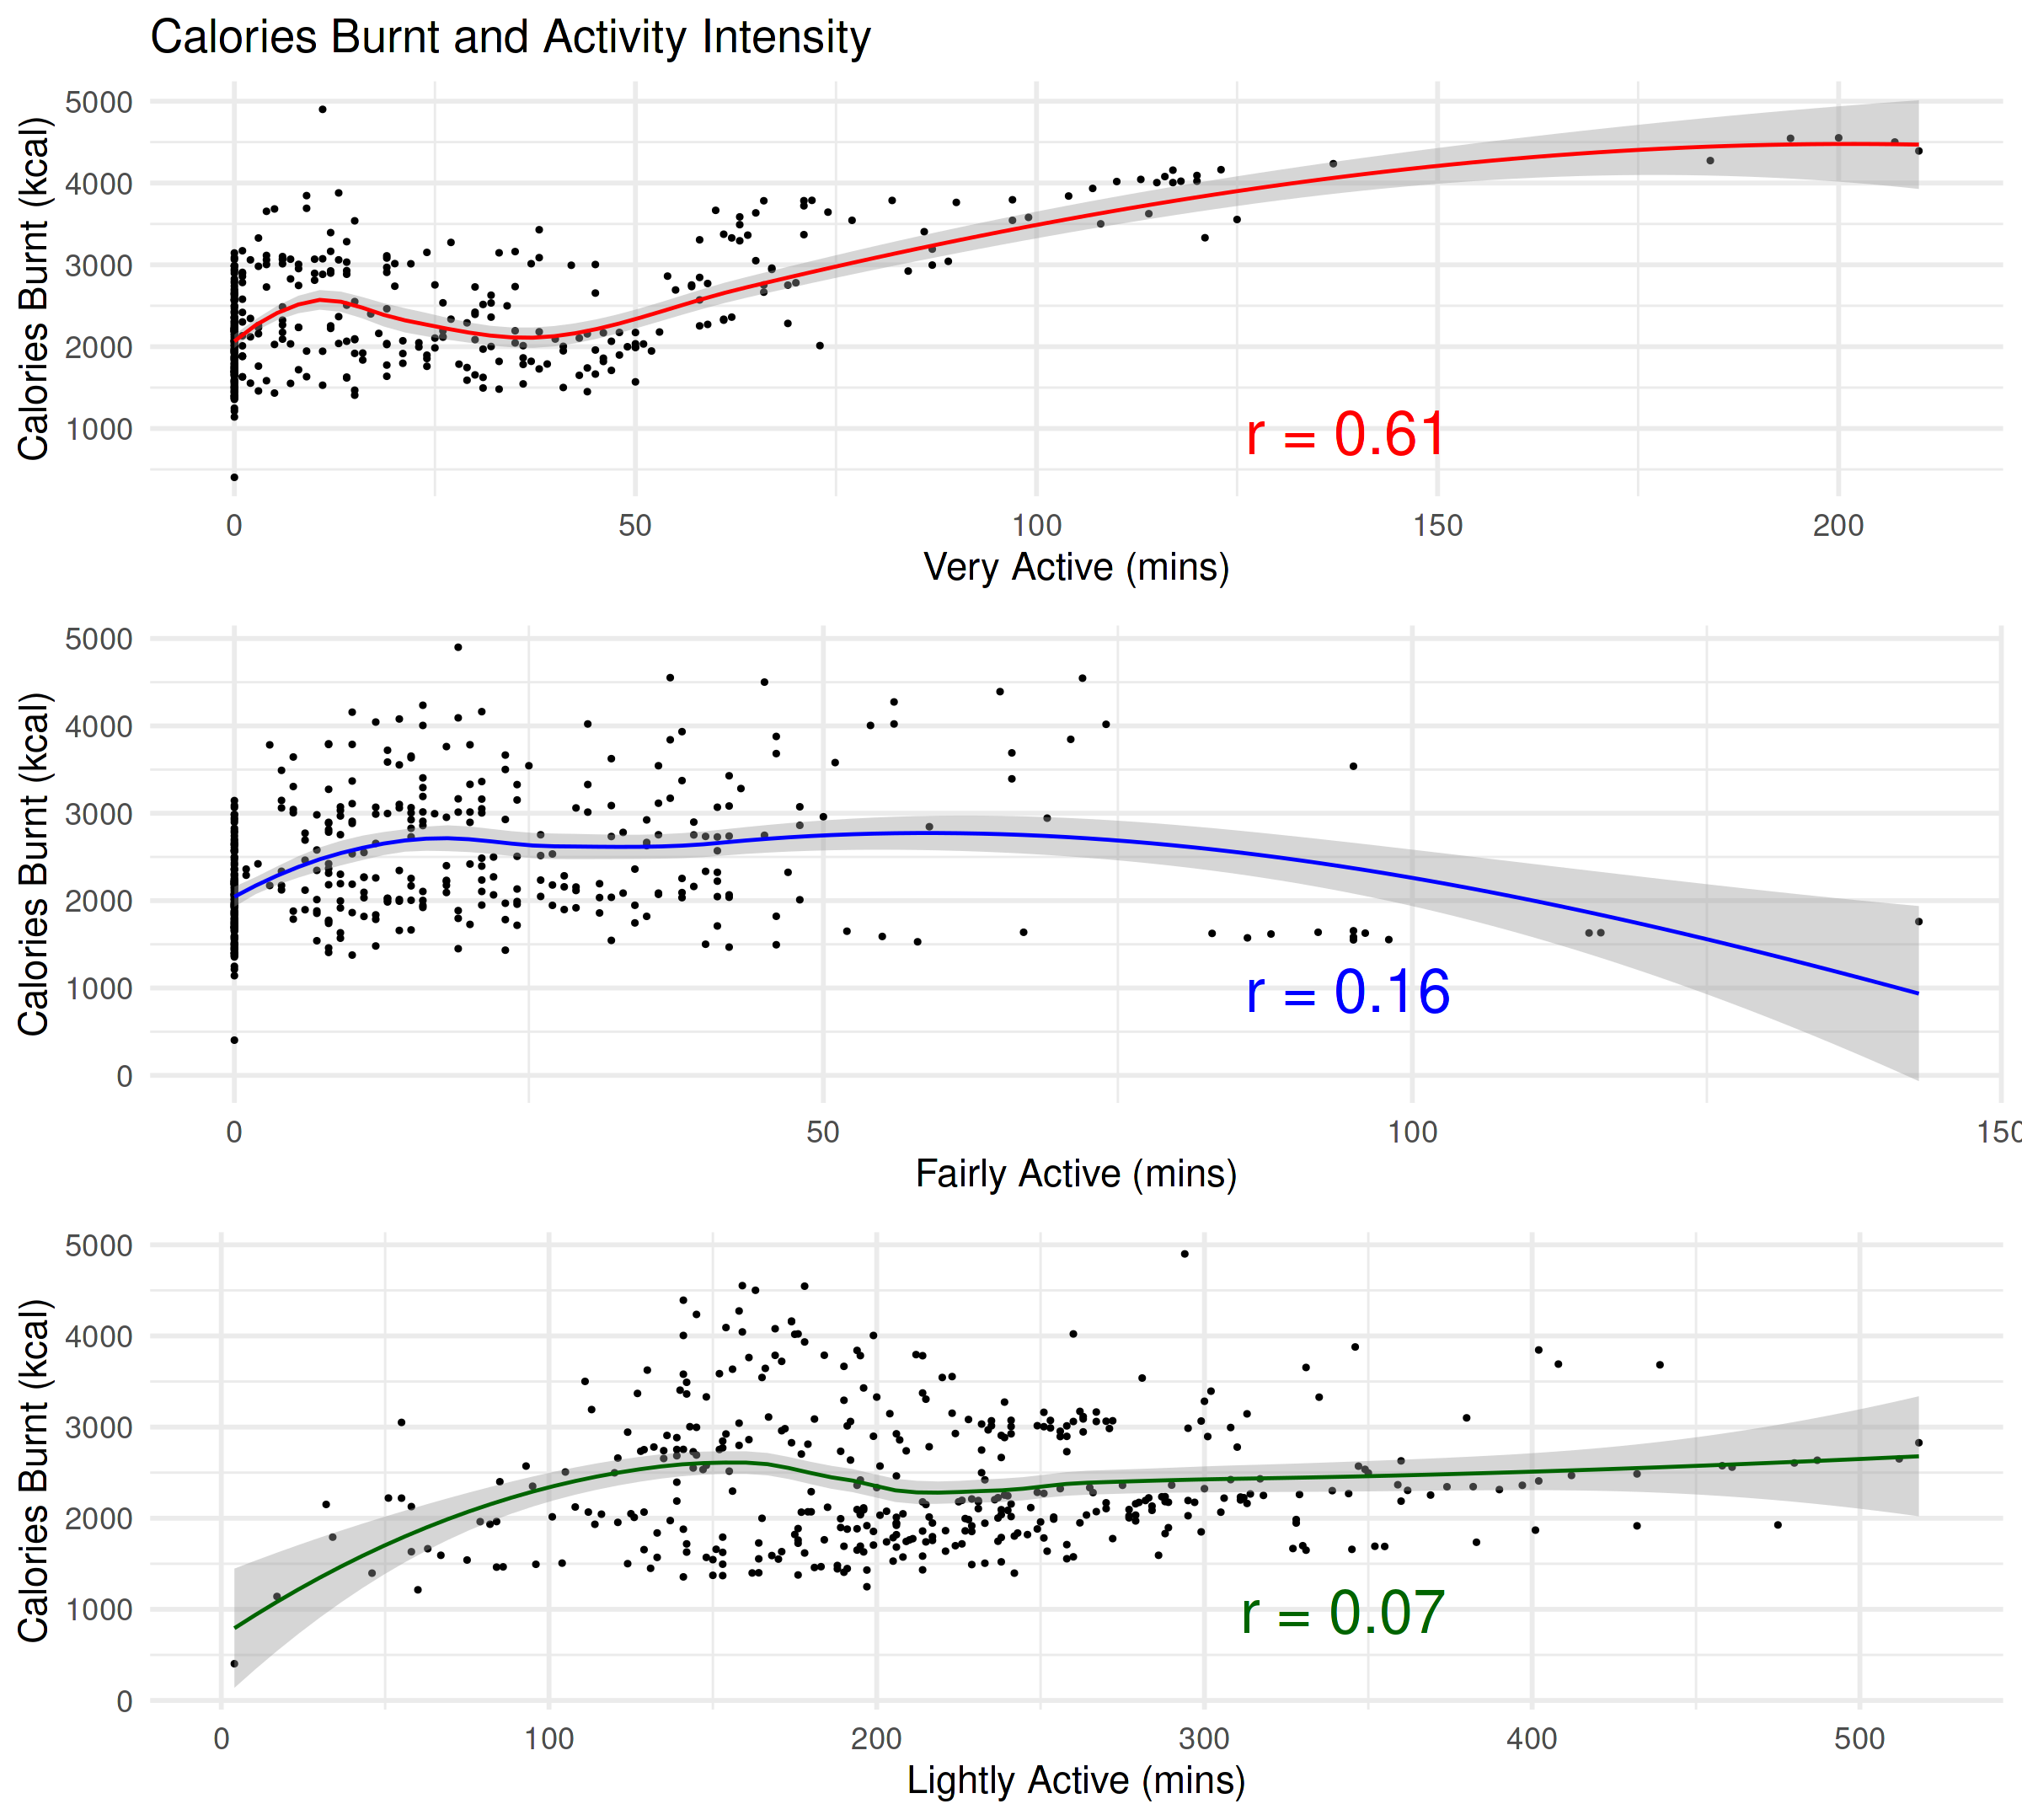

In [77]:
# Correlation values as text
r_calories_very <- paste0("r = ", round(cor(merged$VeryActiveMinutes, merged$Calories), 2))
r_calories_fairly <- paste0("r = ", round(cor(merged$FairlyActiveMinutes, merged$Calories), 2))
r_calories_lightly <- paste0("r = ", round(cor(merged$LightlyActiveMinutes, merged$Calories), 2))
r_calories_sed <- paste0("r = ", round(cor(merged$SedentaryMinutes, merged$Calories), 2))

# Set x-coordinates
x_very <- (.6 * max(merged$VeryActiveMinutes))
x_fairly <- (.6 * max(merged$FairlyActiveMinutes))
x_lightly <- (.6 * max(merged$LightlyActiveMinutes))
x_sed <- (.6 * max(merged$SedentaryMinutes))

# Set y-coordinate
y_calories <- (.25 * max(merged$Calories))


options(repr.plot.width = 20, repr.plot.height = 18)

calories_very <- merged %>%
    ggplot(aes(VeryActiveMinutes, Calories)) +
    geom_point() +
    geom_smooth(method = "loess", color = "red") +
    labs(x="Very Active (mins)", y="Calories Burnt (kcal)", title = "Calories Burnt and Activity Intensity") +
    annotate("text", x = x_very, y = y_calories, label = r_calories_very, color = "red", size = 15, hjust = 0, vjust = 1) +
    theme_minimal(base_size = 27)

calories_fairly <- merged %>%
    ggplot(aes(FairlyActiveMinutes, Calories)) +
    geom_point() +
    geom_smooth(method = "loess", color = "blue") +
    labs(x="Fairly Active (mins)", y = "Calories Burnt (kcal)") +
    annotate("text", x = x_fairly, y = y_calories, label = r_calories_fairly, color = "blue", size = 15, hjust = 0, vjust = 1) +
    theme_minimal(base_size = 27)

calories_lightly <- merged %>%
    ggplot(aes(LightlyActiveMinutes, Calories)) +
    geom_point() +
    geom_smooth(method = "loess", color = "darkgreen") +
    labs(x="Lightly Active (mins)", y="Calories Burnt (kcal)") +
    annotate("text", x = x_lightly, y = y_calories, label = r_calories_lightly, color = "darkgreen", size = 15, hjust = 0, vjust = 1) +
    theme_minimal(base_size = 27)


calories_all2 <- plot_grid(calories_very, calories_fairly, calories_lightly,
                          ncol = 1)
calories_all2

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


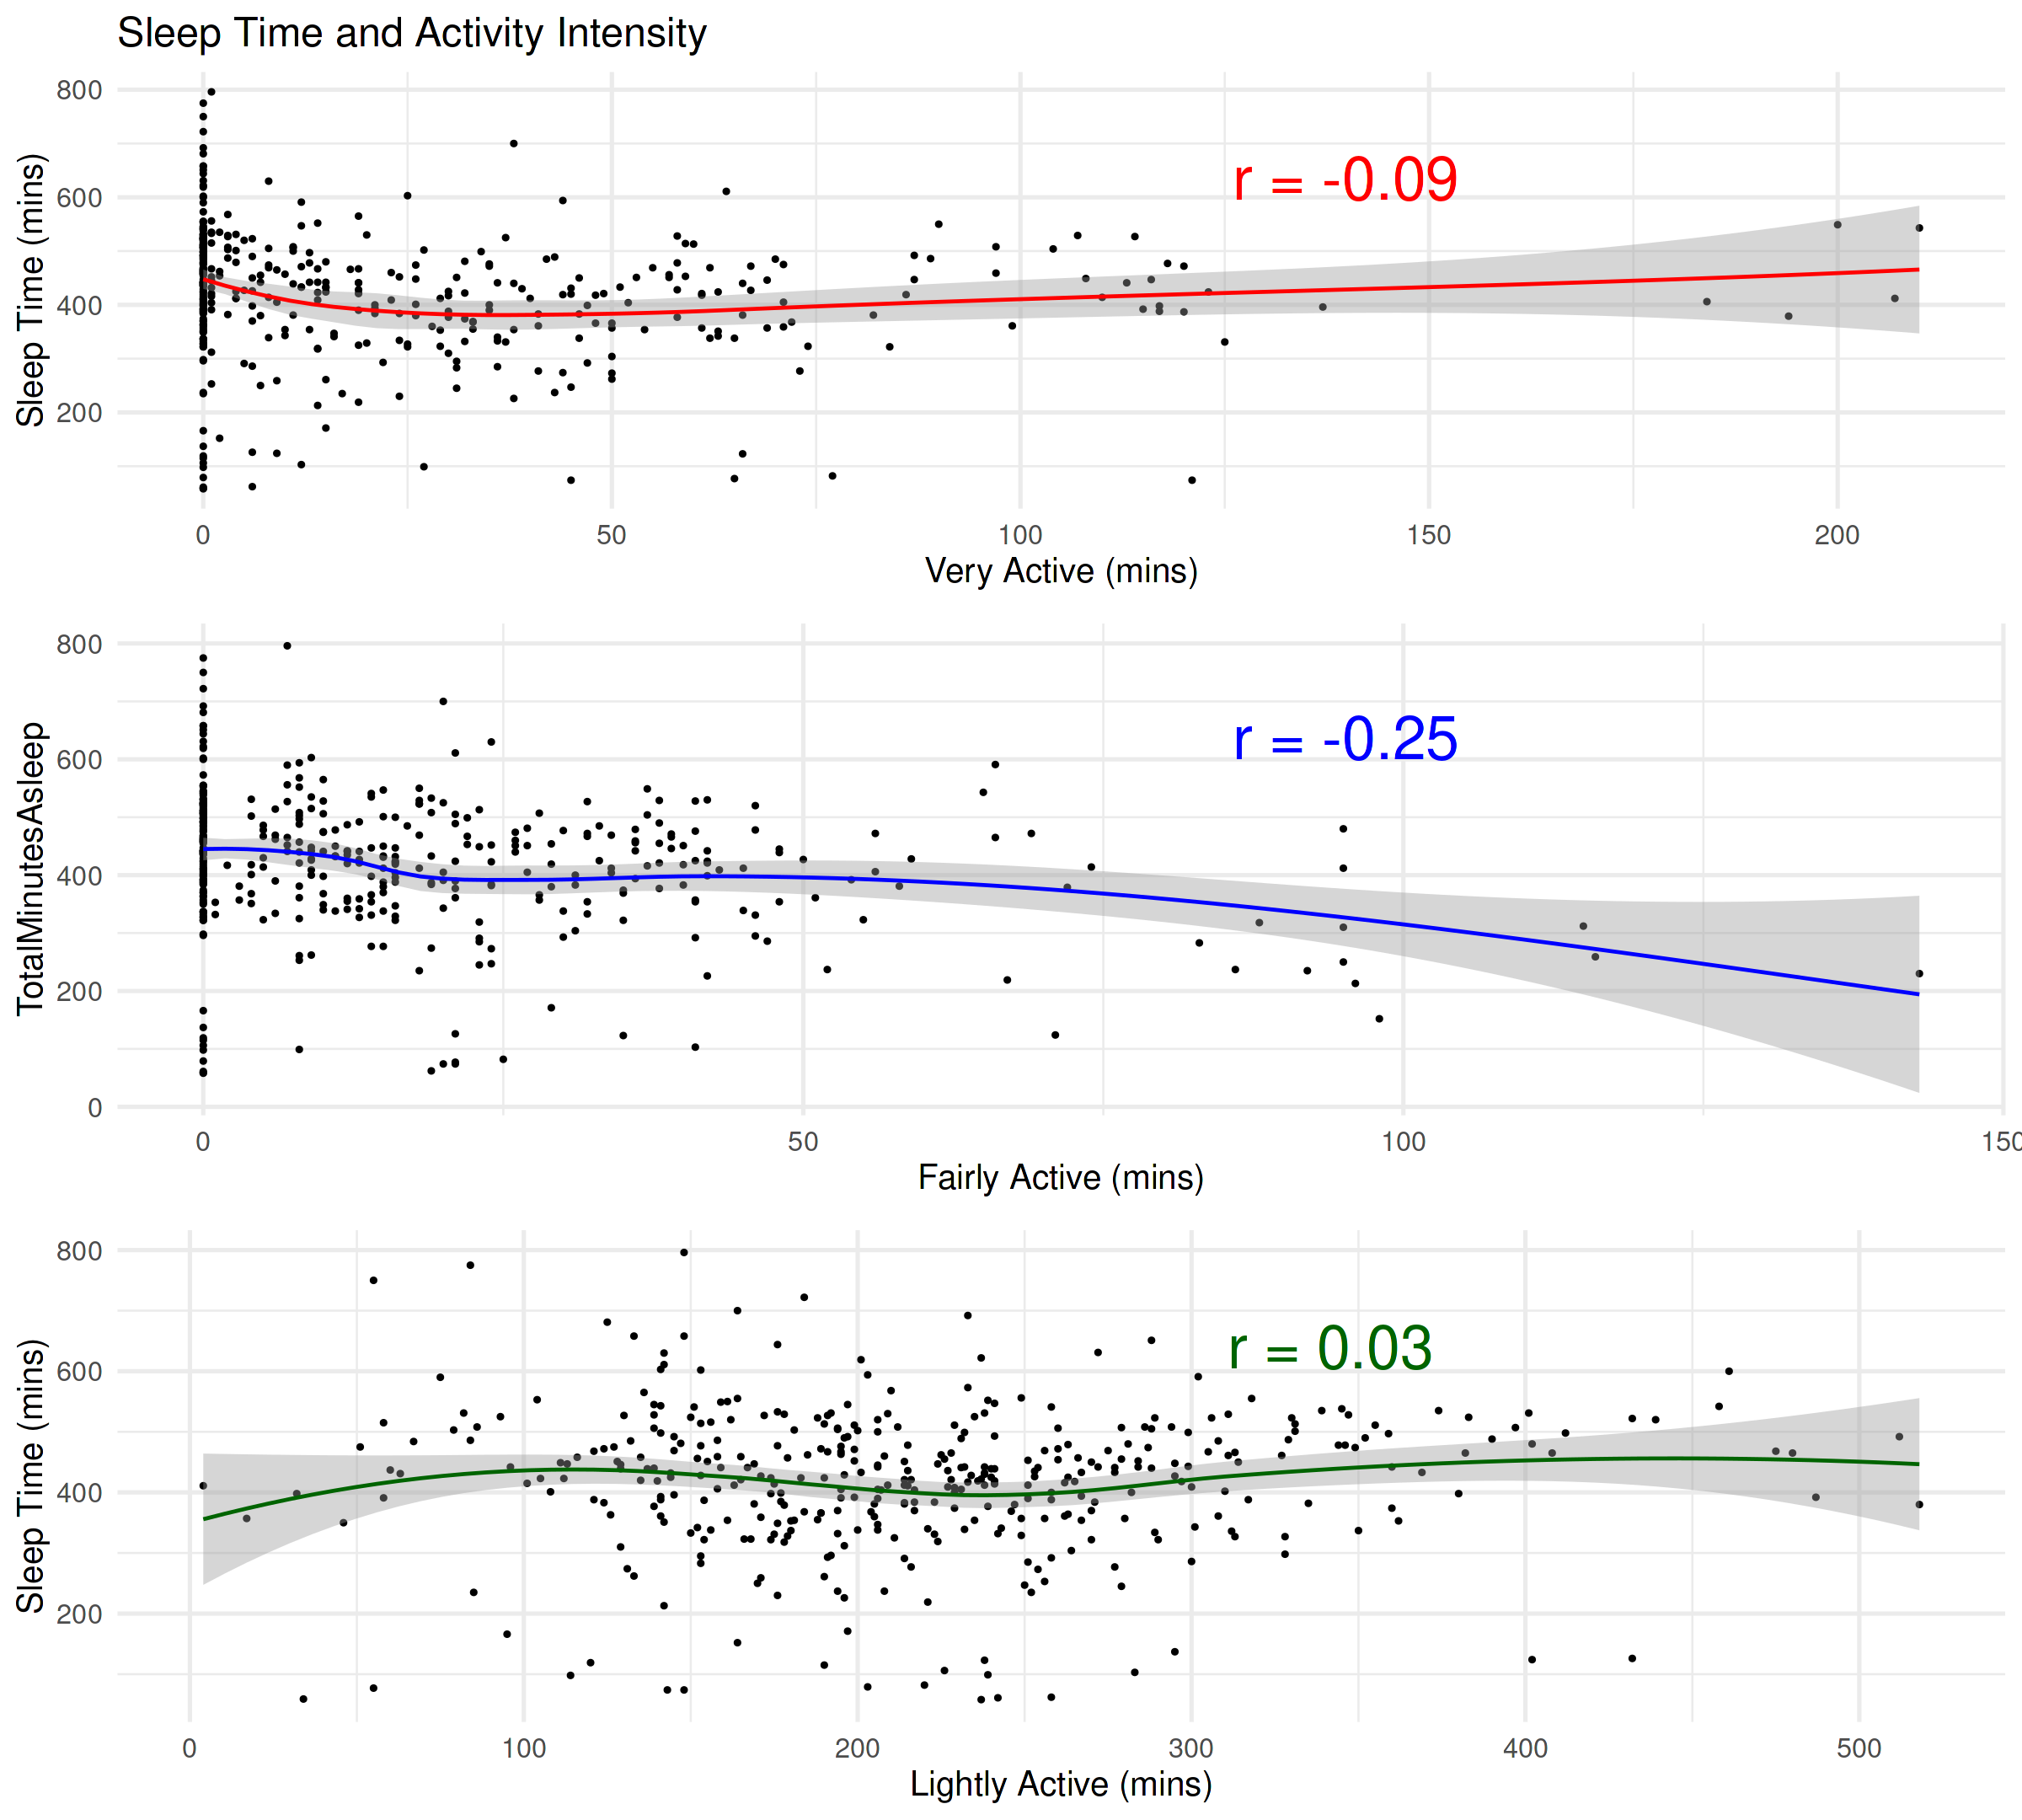

In [78]:
r_sleep_very <- paste0("r = ", round(cor(merged$VeryActiveMinutes, merged$TotalMinutesAsleep), 2))
r_sleep_fairly <- paste0("r = ", round(cor(merged$FairlyActiveMinutes, merged$TotalMinutesAsleep), 2))
r_sleep_lightly <- paste0("r = ", round(cor(merged$LightlyActiveMinutes, merged$TotalMinutesAsleep), 2))
r_sleep_sed <- paste0("r = ", round(cor(merged$SedentaryMinutes, merged$TotalMinutesAsleep), 2))

y_sleep <- (.85 * max(merged$TotalMinutesAsleep))

options(repr.plot.width = 20, repr.plot.height = 18)

sleep_very <- merged %>%
    ggplot(aes(VeryActiveMinutes, TotalMinutesAsleep)) +
    geom_point() +
    geom_smooth(method = "loess", color = "red") +
    labs(x="Very Active (mins)", y="Sleep Time (mins)", title = "Sleep Time and Activity Intensity") +
    annotate("text", x = x_very, y = y_sleep, label = r_sleep_very, color = "red", size = 15, hjust = 0, vjust = 1) +
    theme_minimal(base_size = 24)

sleep_fairly <- merged %>%
    ggplot(aes(FairlyActiveMinutes, TotalMinutesAsleep)) +
    geom_point() +
    geom_smooth(method = "loess", color = "blue") +
    labs(x="Fairly Active (mins)", "Sleep Time (mins)") +
    annotate("text", x = x_fairly, y = y_sleep, label = r_sleep_fairly, color = "blue", size = 15, hjust = 0, vjust = 1) +
    theme_minimal(base_size = 24)

sleep_lightly <- merged %>%
    ggplot(aes(LightlyActiveMinutes, TotalMinutesAsleep)) +
    geom_point() +
    geom_smooth(method = "loess", color = "darkgreen") +
    labs(x="Lightly Active (mins)", y="Sleep Time (mins)") +
    annotate("text", x = x_lightly, y = y_sleep, label = r_sleep_lightly, color = "darkgreen", size = 15, hjust = 0, vjust = 1) +
    theme_minimal(base_size = 24)


sleep_all2 <- plot_grid(sleep_very, sleep_fairly, sleep_lightly,
                       ncol = 1)
sleep_all2

# merged %>%
#     ggplot(aes(SedentaryMinutes, TotalMinutesAsleep)) +
#     geom_point() +
#     geom_smooth(method = "lm", color = "blue") +
#     labs(x="Very Active (mins)", y="Sleep Time (kcal)") +
#     annotate("text", x = text_x_very, y = text_y_sleep, label = r_sleep_very, color = "red", size = 15, hjust = 0, vjust = 1) +
#     theme_minimal(base_size = 24)

In [79]:
str(weight)

'data.frame':	67 obs. of  7 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...


In [80]:
summary(weight)

       Id                Date              WeightKg       WeightPounds  
 Min.   :1.504e+09   Length:67          Min.   : 52.60   Min.   :116.0  
 1st Qu.:6.962e+09   Class :character   1st Qu.: 61.40   1st Qu.:135.4  
 Median :6.962e+09   Mode  :character   Median : 62.50   Median :137.8  
 Mean   :7.009e+09                      Mean   : 72.04   Mean   :158.8  
 3rd Qu.:8.878e+09                      3rd Qu.: 85.05   3rd Qu.:187.5  
 Max.   :8.878e+09                      Max.   :133.50   Max.   :294.3  
      BMI        IsManualReport         LogId          
 Min.   :21.45   Length:67          Min.   :1.460e+12  
 1st Qu.:23.96   Class :character   1st Qu.:1.461e+12  
 Median :24.39   Mode  :character   Median :1.462e+12  
 Mean   :25.19                      Mean   :1.462e+12  
 3rd Qu.:25.56                      3rd Qu.:1.462e+12  
 Max.   :47.54                      Max.   :1.463e+12  

In [81]:
options(repr.plot.width = 22, repr.plot.height = 8)
merged %>%
    ggplot(aes(Calories, TotalSteps)) +
    geom_point() +
    geom_smooth(method = "lm", color = "blue") +
    labs(title="Calories Burnt and Step Count Correlation", x="Step Count", y="Calories Burnt") +
    annotate("text", x = 750, y = 15000, label = r_cal_step, color = "red", size = 15, hjust = 0, vjust = 1) +
    theme_minimal(base_size = 28)

ERROR: Error in eval(expr, envir, enclos): object 'r_cal_step' not found


In [ ]:
sleep_sed <- merged %>%
    ggplot(aes(SedentaryMinutes, TotalMinutesAsleep)) +
    geom_point() +
    geom_smooth(method = "lm", color = "blue") +
    labs(x="Very Active (mins)", y="Sleep Time (kcal)") +
    annotate("text", x = text_x_very, y = text_y_sleep, label = r_sleep_very, color = "red", size = 15, hjust = 0, vjust = 1) +
    theme_minimal(base_size = 24)

sleep_all

### OBSERVATION 2 (PART 1/2):

Active Ratio and calories burnt exhibit a positive correlation of 0.14, indicating that **more active time generally leads to higher calorie expenditure**. When analyzing activity intensities separately, we see that **time spent very active is signficiantly more correlated to more calories being burnt** (r = 0.61) **compared to the amount of time spent fairly and lightly active** (r = 0.18 and r = 0.11, respectively). 

1. Utilize real-time feedback through the app to help users track their activity levels and calories burnt. While high-intensity activities are effective, it's important to maintain a balanced activity mix. **Bellabeat can provide insights and tips on combining very active, fairly active, and lightly active times throughout the day to achieve overall wellness**. This approach helps users avoid burnout and ensures a sustainable fitness routine, which can be achieved using live dashboards highlighting the users' balance mix. 

2. Given that very active time has the strongest positive correlation with calories burnt (r = 0.61), **Bellabeat can encourage users who wish to burn calories more to incorporate more high-intensity exercises into their routines**. This could include personalized workout plans, challenges, and reminders tailored to increase very active minutes spent.

## 8. When to Push Notifications

In [ ]:
str(MET_minutes)
str(heartrate_seconds)

In [ ]:
hour_labels <- as.character(1:24)

# Set the peak hours to highlight
shade_data1 <- data.frame(
  xmin = c(10.5),
  xmax = c(15.5),
  ymin = -Inf,
  ymax = Inf
)

shade_data2 <- data.frame(
  xmin = c(16.5),
  xmax = c(20.5),
  ymin = -Inf,
  ymax = Inf
)

options(repr.plot.width = 19, repr.plot.height = 8)

plot_bar_calories <- hourly_calories %>%
    mutate(Hour = factor(Hour, levels = 0:23)) %>%
    ggplot(aes(x = Hour, y = Calories)) +
    stat_summary(fun = mean, geom = "bar", fill = "lightblue") +
    geom_rect(data = shade_data1, aes(xmin = xmin, xmax = xmax, ymin = 0, ymax = ymax),
            fill = "gray", alpha = 0.4, inherit.aes = FALSE) +
    geom_rect(data = shade_data2, aes(xmin = xmin, xmax = xmax, ymin = 0, ymax = ymax),
            fill = "gray", alpha = 0.4, inherit.aes = FALSE) +
    labs(title = "Average Calories Burned per Hour",
        x = "Hour of the Day (24-hours)",
        y = "Calories (kcal)") +
    scale_x_discrete(labels = hour_labels) +
    theme_minimal() +
    theme_grey(base_size = 26)

plot_bar_calories

plot_bar_intensity <- hourly_intensity %>%
    mutate(Hour = factor(Hour, levels = 0:23)) %>%
    ggplot(aes(x = Hour, y = AverageIntensity)) +
    stat_summary(fun = mean, geom = "bar", fill = "pink") +
    geom_rect(data = shade_data1, aes(xmin = xmin, xmax = xmax, ymin = 0, ymax = ymax),
            fill = "gray", alpha = 0.4, inherit.aes = FALSE) +
    geom_rect(data = shade_data2, aes(xmin = xmin, xmax = xmax, ymin = 0, ymax = ymax),
            fill = "gray", alpha = 0.4, inherit.aes = FALSE) +
    labs(title = "Average Activity Intensity per Hour",
         x = "Hour of the Day (24-hours)",
         y = "Level of Intensity") +
    scale_x_discrete(labels = hour_labels) +
    theme_minimal() +
    theme_grey(base_size = 26)

plot_bar_intensity

plot_bar_heartrate <- heartrate_seconds %>%
    mutate(Hour = factor(Hour, levels = 0:23)) %>%
    ggplot(aes(x = Hour, y = Value)) +
    stat_summary(fun = mean, geom = "bar", fill = "#CC3333") +
    geom_rect(data = shade_data1, aes(xmin = 9.5, xmax = 15.5, ymin = 0, ymax = ymax),
              fill = "gray", alpha = 0.4, inherit.aes = FALSE) +
    geom_rect(data = shade_data2, aes(xmin = 16.5, xmax = 20.5, ymin = 0, ymax = ymax),
              fill = "gray", alpha = 0.4, inherit.aes = FALSE) +
    labs(title = "Average Heart Rate per Hour",
         x = "Hour of the Day (24-hours)",
         y = "Heart Rate (bpm)") +
    scale_x_discrete(labels = hour_labels) +
    theme_minimal() +
    theme_grey(base_size = 26)

plot_bar_heartrate

### OBSERVATION 2 (PART 2/2):

The above two tables - highlighting average calories burnt per hour and average intensitiy of acitivity per hour, give a clear picture to when users tend to choose to do more intense workouts and at what times they tend to burn the most calories.

Given that the average intensity of activities peaks between 11 am-3 pm and 5 pm-8 pm, reminders and workout suggestions can be optimally timed around these periods. **For high-intensity workouts, users can be notified just before these peak times (11 am or 5 pm). Conversely, since activity intensity is relatively lower in the morning (7 am-11 am) and evening (after 8 pm), light activity notifications can be scheduled for these times**. 

These notifications can be further personalized based on each user's activity data and daily habits. Tailoring these reminders to each user's personal data and daily routines can increase the likelihood of users engaging with and acting on these notifications.

## 9. Sedentary Minutes vs Total Sleep Time

We will observe the relationship between sedentary time spent and total sleep time to drive insights in promoting better sleep.

In [ ]:
# Variables
optimal_sleep <- 480

# Find the optimal sedentary where the predicted y-value is closest to the optimal sleep time of 8 hours
loess_fit <- loess(TotalMinutesAsleep ~ SedentaryMinutes, data = merged)
x_vals <- seq(min(merged$SedentaryMinutes, na.rm = TRUE), max(merged$SedentaryMinutes, na.rm = TRUE), length.out = 1000)
y_vals <- predict(loess_fit, newdata = data.frame(SedentaryMinutes = x_vals))
optimal_sedentary_vals <- x_vals[abs(y_vals - optimal_sleep) <= 1]
optimal_sedentary <- max(optimal_sedentary_vals)

r_sleep_sedentary <- round(cor(merged$SedentaryMinutes, merged$TotalMinutesAsleep), 3)
text_r_sleep_sedentary <- paste0("r = ", r_sleep_sedentary)


y_horizontals <- (.1 * max(merged$TotalMinutesAsleep))


# PLOT
options(repr.plot.width = 19, repr.plot.height = 8)

sleep_sedentary <- merged %>%
    ggplot(aes(SedentaryMinutes, TotalMinutesAsleep)) +
    geom_point() +
    geom_smooth(color = "green") + 
    geom_hline(yintercept = optimal_sleep, linetype = "dashed", color = "red") +
    geom_vline(xintercept = optimal_sedentary, linetype = "dashed", color = "red") +
    geom_vline(xintercept = mean(merged$SedentaryMinutes), linetype = "dashed", color = "blue") +
    scale_x_continuous(breaks = seq(0, max(merged$SedentaryMinutes), by = max(merged$SedentaryMinutes) / 10)) +

    # Correlation
    annotate("text", x = 50, y = 170, 
             label = text_r_sleep_sedentary,  
             color = "red", size = 15, hjust = 0, vjust = 1) + 

    # VERTICAL (OPT SED)
    annotate("text", x = (optimal_sedentary - 60), y = (.1 * max(merged$TotalMinutesAsleep)),
             label = round(optimal_sedentary), 
             color = "red", size = 10, hjust = 0.8, vjust = 1) + 

    annotate("text", x = (optimal_sedentary - 60), y = (.1 * max(merged$TotalMinutesAsleep)) - 50,
             label = "(Optimal)", 
             color = "red", size = 8, hjust = 0.5, vjust = 1.5) + 

    # VERTICAL (AVG SED)
    annotate("text", x = (mean(merged$SedentaryMinutes) + 25), y = (.1 * max(merged$TotalMinutesAsleep)), 
             label = round(mean(merged$SedentaryMinutes)), 
             color = "blue", size = 10, hjust = 0, vjust = 1) +  

    annotate("text", x = (mean(merged$SedentaryMinutes) + 25), y = (.1 * max(merged$TotalMinutesAsleep)) - 50, 
             label = "(Fitbit Average)", 
             color = "blue", size = 8, hjust = 0, vjust = 1.5) +

    # HORIZONTAL (OPT SLEEP)
    annotate("text", x = (.8 * max(merged$SedentaryMinutes)), y = (optimal_sleep + 65), 
             label = optimal_sleep, 
             color = "red", size = 10, hjust = 0, vjust = -.5)  + 

    annotate("text", x = (.8 * max(merged$SedentaryMinutes)), y = (optimal_sleep + 35), 
             label = "(Optimal Sleep Time)", 
             color = "red", size = 8, hjust = 0, vjust = 0) +  

    geom_point(aes(x = optimal_sedentary, y = optimal_sleep), color = "red", size = 3) +
    labs(title = "Sedentary Time vs Sleep Time", x="Sedentary Minutes", y="Sleep Minutes") + 
    theme_minimal(base_size = 28)

sleep_sedentary

cat("\nOptimal sleep time (8 hours):\n")
print(paste0(round(optimal_sleep), " minutes"))
cat("\nOptimal sedentary time that corresponds to optimal sleep time of 8 hours:\n")
print(paste0(round(optimal_sedentary), " minutes"))
cat("\nAverage sedentary time of Fitbit users:\n")
print(paste0(round(mean(merged$SedentaryMinutes)), " minutes"))

In [ ]:
ggsave("sedentarySleep_plot.pdf", plot1, width = 8, height = 8, units = "cm")

### OBSERVATION 3:

The data indicates that **as users spend more time being sedentary, their total sleep time tends to decrease with a relatively high correlation (r = -0.6)**. The average sedentary time of users of Fitbit is 713 minutes, while the optimal sedentary time corresponding to an optimal sleep duration of 8 hours (480 minutes) is 612 minutes on average for the 30-day period of April-May. 

Given that the recommended sleep duration for young adults and adults is 7-9 hours ([CITE](https://www.sciencedirect.com/science/article/abs/pii/S2352721815000157)), it is recommended to **send a notification to users before their total sedentary time reaches the optimal threshold of 612 minutes**. This will encourage users to reduce their sedentary time to achieve the recommended sleep duration and improve overall health. These reminders can be personalized and timed based on each user's individual activity and sleep data, ensuring that they align with the user's optimal sleep time and sedentary hours.